# 06. R과 시각화

* 코난아카데미 : 데이터분석 기초
* 작성자 : 김무성

# 차례

* R 기본 그래픽스
* ggplot2 

# 추천 사이트

* ggplot2 - http://docs.ggplot2.org/current/

# 추천 자료

* ggplot2 - TAU R Workshop 2015 - http://taurworkshop.weebly.com/uploads/1/1/8/0/11809018/ggplot2-final.pptx

# R 기본 그래픽스 [1]

* A simple scatterplot
* Some standard plots
    - Scatterplot
    - Histogram
    - Barplot
    - Boxplot
    - Persp
    - Piechart

## A simple scatterplot

In [195]:
pressure

   temperature pressure
1            0   0.0002
2           20   0.0012
3           40   0.0060
4           60   0.0300
5           80   0.0900
6          100   0.2700
7          120   0.7500
8          140   1.8500
9          160   4.2000
10         180   8.8000
11         200  17.3000
12         220  32.1000
13         240  57.0000
14         260  96.0000
15         280 157.0000
16         300 247.0000
17         320 376.0000
18         340 558.0000
19         360 806.0000

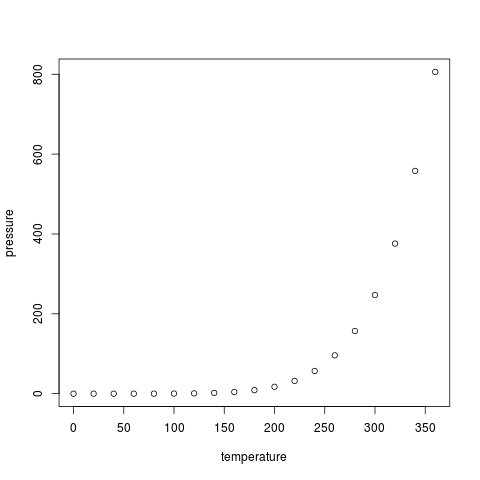

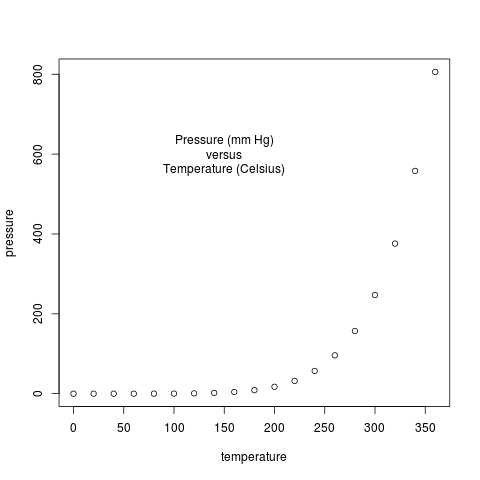

In [194]:
plot(pressure)
text(150, 600, 
     "Pressure (mm Hg)\nversus\nTemperature (Celsius)")

## Some standard plots

### Scatterplot

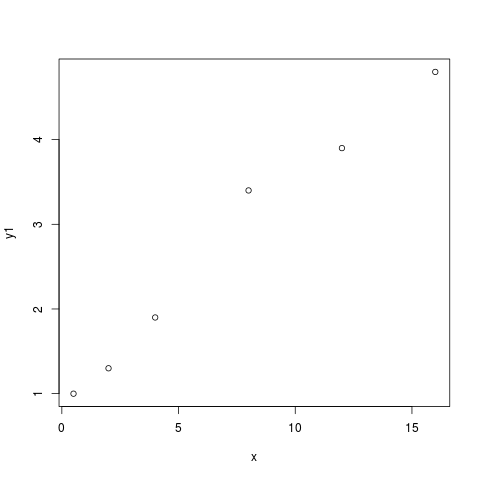

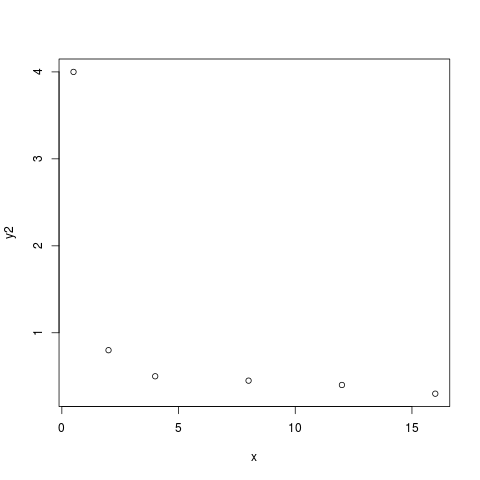

In [209]:
x <- c(0.5, 2, 4, 8, 12, 16)
y1 <- c(1, 1.3, 1.9, 3.4, 3.9, 4.8)
y2 <- c(4, .8, .5, .45, .4, .3)
plot(x, y1)
plot(x, y2)

### Histogram

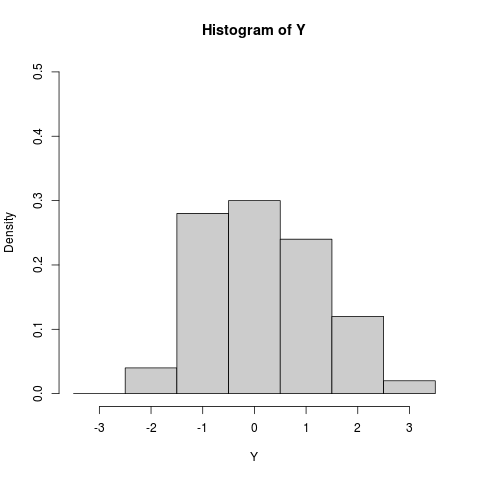

In [212]:
# Random data
Y <- rnorm(50)
# Make sure no Y exceed [-3.5, 3.5]
Y[Y < -3.5 | Y > 3.5] <- NA
x <- seq(-3.5, 3.5, .1)
dn <- dnorm(x)
#par(mar=c(4.5, 4.1, 3.1, 0))
hist(Y, breaks=seq(-3.5, 3.5), ylim=c(0, 0.5), 
     col="grey80", freq=FALSE)

### Barplot

In [219]:
VADeaths

      Rural Male Rural Female Urban Male Urban Female
50-54       11.7          8.7       15.4          8.4
55-59       18.1         11.7       24.3         13.6
60-64       26.9         20.3       37.0         19.3
65-69       41.0         30.9       54.6         35.1
70-74       66.0         54.3       71.1         50.0

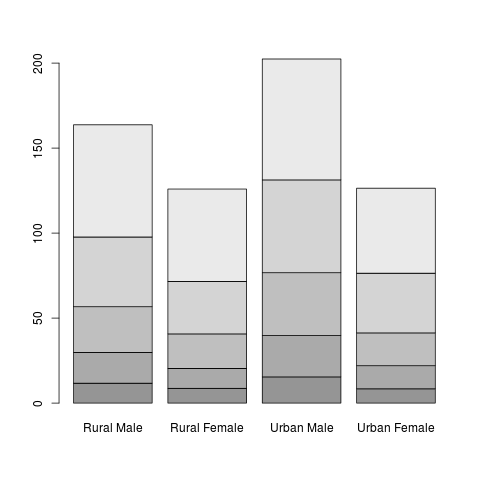

In [218]:
# Modified from example(barplot)
barplot(VADeaths, col=grey(0.5 + 1:5/12))

### Boxplot

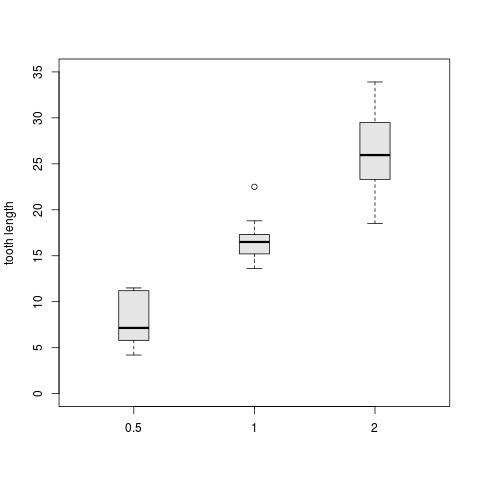

In [224]:
# Modified example(boxplot) - itself from suggestion by Roger Bivand
boxplot(len ~ dose, data = ToothGrowth,
    boxwex = 0.25, at = 1:3 - 0.2,
    subset= supp == "VC", col="grey90",
    xlab="",
    ylab="tooth length", ylim=c(0,35))

### Persp

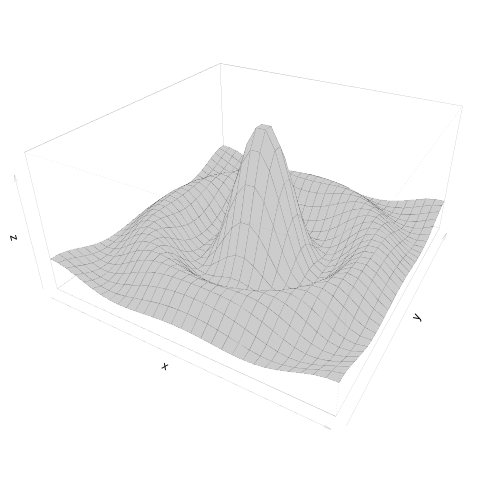

In [225]:
# Almost exactly example(persp)
    x <- seq(-10, 10, length= 30)
     y <- x
     f <- function(x,y) { r <- sqrt(x^2+y^2); 10 * sin(r)/r }
     z <- outer(x, y, f)
     z[is.na(z)] <- 1
# 0.5 to include z axis label
par(mar=c(0, 0.5, 0, 0), lwd=0.1)
     persp(x, y, z, theta = 30, phi = 30, expand = 0.5, col = "grey80")
par(mar=c(5.1, 4.1, 4.1, 2.1), lwd=1)

### Piechart

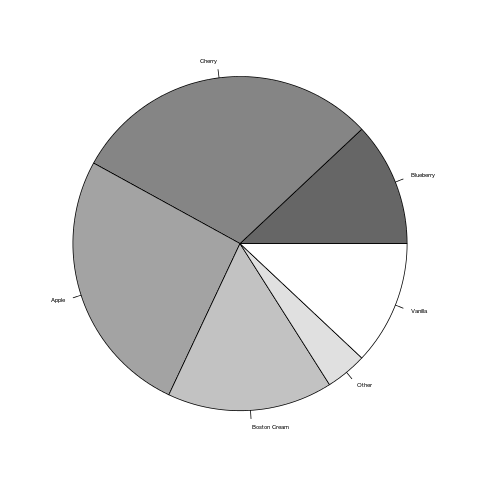

In [226]:
# Example 4 from help(pie)
par(mar=c(0, 2, 1, 2), xpd=FALSE, cex=0.5)
     pie.sales <- c(0.12, 0.3, 0.26, 0.16, 0.04, 0.12)
     names(pie.sales) <- c("Blueberry", "Cherry",
         "Apple", "Boston Cream", "Other", "Vanilla")
     pie(pie.sales, col = gray(seq(0.4,1.0,length=6)))

# ggplot2 

* ggplot2 기본 개념 [2~5]
* Bar Graphs [6]
* Line Graphs [6]
* Scatter Plots [6]
* Summarized Data Distributions [6]
* Annotations [6]
* Axes [6]
* Controlling the Overall Appearance of Graphs [6]
* Legends [6]
* Facets [6]
* Using Colors in Plots [6]

## ggplot2 기본 개념

In [ ]:
# install.packages("ggplot2")
# install.packages("gcookbook") # 참고문헌의 예제

### R 기본 그래프와 ggplot2 비교 [2]

In [180]:
head(mtcars)

                   mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1

In [181]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


In [182]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

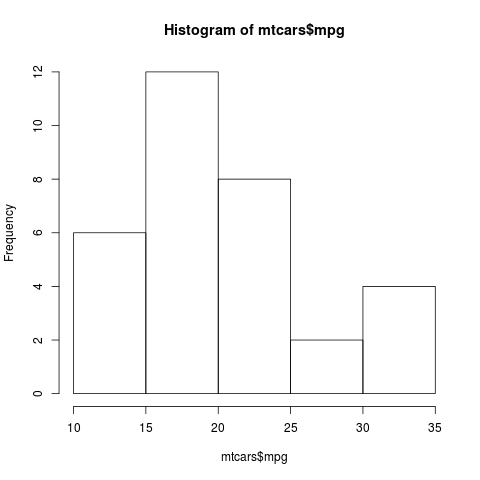

In [183]:
# histogram

# 기본본본
hist(mtcars$mpg)

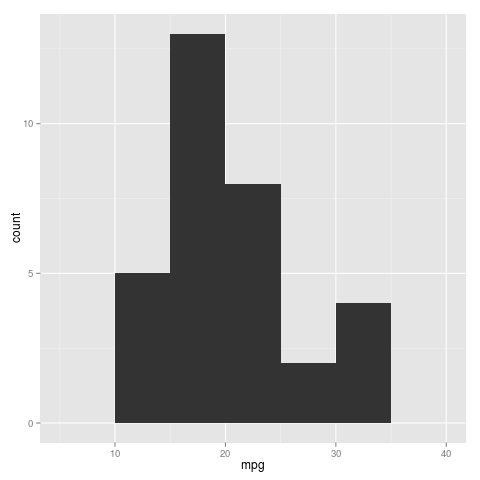

In [186]:
# ggplot2
library(ggplot2)

ggplot(mtcars, aes(x=mpg)) + geom_histogram(binwidth=5)

In [ ]:
# 좀 복잡한 그래프

# 기본 
par(mar = c(4, 4, .1, .1))

plot(mpg ~ hp, 
     data = subset(mtcars, am==1),
     xlim=c(50, 450), ylim=c(5, 40))

points(mpg ~hp, col="red",
        data = subset(mtcars, am==0))

legend(350, 40,
       c("1", "0"), title="am",
       col=c("black", "red"),
       pch=c(1, 1))    

<img src='07_figures/07_eg_cplx_basic.png' />

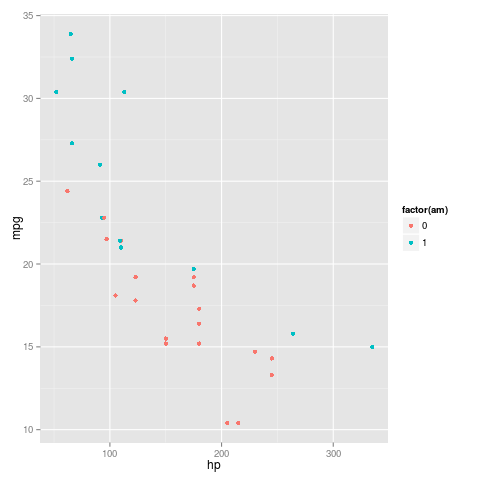

In [190]:
# ggplot2

ggplot(mtcars, aes(x=hp, y=mpg, color=factor(am))) +
    geom_point()

###  ggplot2 기본 요소들 [3, 4]

* Geometric objects (geoms)
* Aesthetics
* Stats 

<img src='07_figures/07_fig.4.5.png' />

<img src='07_figures/07_fig.4.6.png' />

### Example [5]

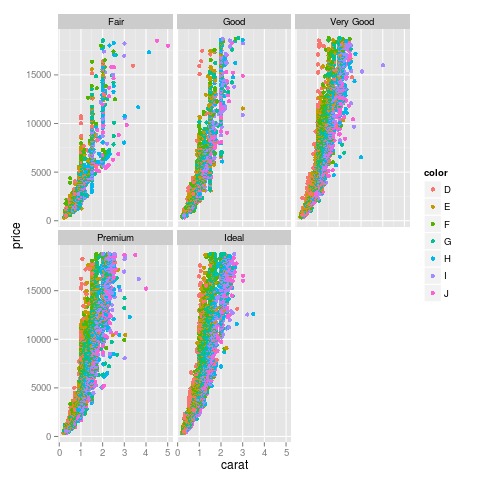

In [192]:
ggplot() + 
    coord_cartesian() +
    scale_x_continuous() +
    scale_y_continuous() +
    scale_color_hue() +
    facet_wrap(~cut) +
    layer(
      data=diamonds, 
      mapping=aes(x=carat, y=price, color=color),   # Aesthetics
      stat="identity",  # Stats
      stat_params=list(), 
      geom="point", # geoms
      geom_params=list(), 
      position=position_jitter()
)

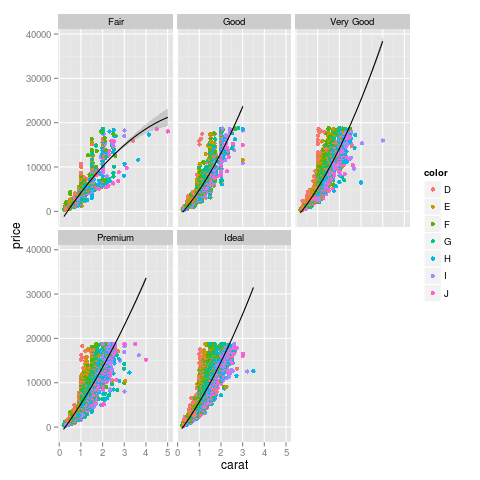

In [193]:
ggplot() + 
    coord_cartesian() +
    scale_x_continuous() +
    scale_y_continuous() +
    scale_color_hue() +
    facet_wrap(~cut) +
    layer(
        data=diamonds, 
        mapping=aes(x=carat, y=price, color=color), 
        stat="identity", 
        stat_params=list(), 
        geom="point", 
        geom_params=list(), 
        position=position_jitter()
    ) +
    layer(
        data=diamonds,
        mapping=aes(x=carat,y=price),
        stat="smooth",
        stat_params=list(method="glm", formula=y~poly(x,2)),
        geom="smooth",
        geom_params=list(color="black"),
        position=position_identity()
    )

## Bar Graphs

In [7]:
library(ggplot2)
library(gcookbook)

In [8]:
pg_mean

  group weight
1  ctrl  5.032
2  trt1  4.661
3  trt2  5.526

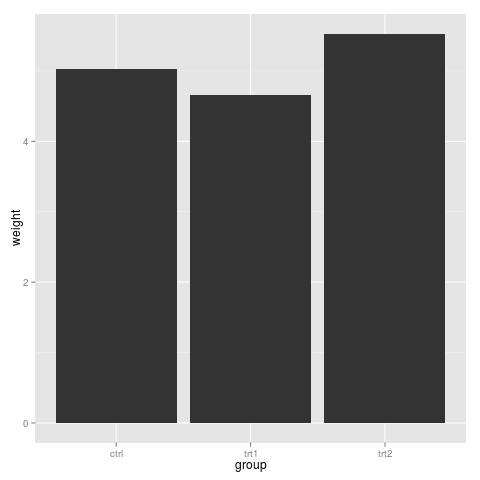

In [13]:
ggplot(pg_mean, aes(x=group, y=weight)) + 
        geom_bar(stat="identity")

In [14]:
BOD

  Time demand
1    1    8.3
2    2   10.3
3    3   19.0
4    4   16.0
5    5   15.6
6    7   19.8

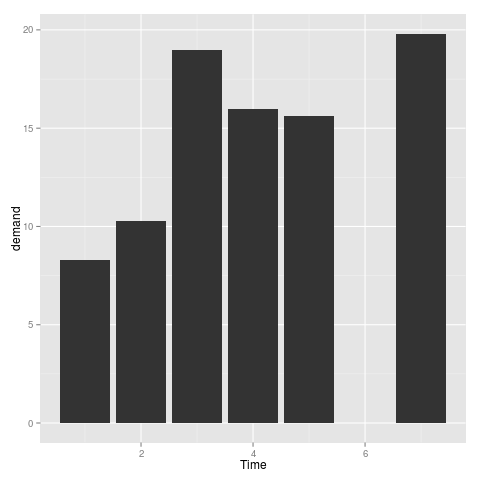

In [15]:
# Time이 연속형이라, 자료에 6이 없으면 x 축에 빈 값으로 표시됨.
ggplot(BOD, aes(x=Time, y=demand)) + 
    geom_bar(stat="identity")

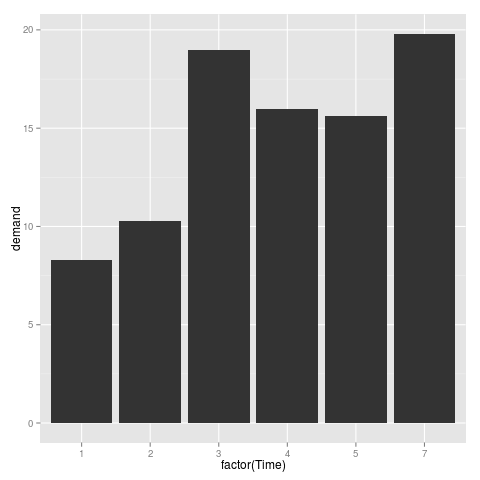

In [16]:
# 이때 Time을 factor 형태로 바꾸면 
ggplot(BOD, aes(x=factor(Time), y=demand)) + 
    geom_bar(stat="identity")

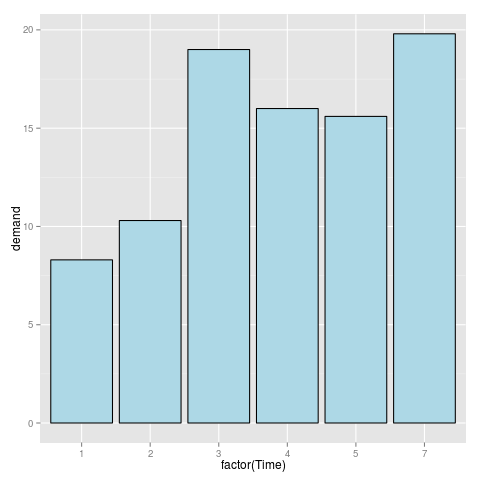

In [12]:
ggplot(BOD, aes(x=factor(Time), y=demand)) +  
    geom_bar(stat="identity", 
                 fill="lightblue",  # 막대색 설정
                 colour="black") # 막대 테두리 설정, colour 혹은 color

In [17]:
cabbage_exp

  Cultivar Date Weight        sd  n         se
1      c39  d16   3.18 0.9566144 10 0.30250803
2      c39  d20   2.80 0.2788867 10 0.08819171
3      c39  d21   2.74 0.9834181 10 0.31098410
4      c52  d16   2.26 0.4452215 10 0.14079141
5      c52  d20   3.11 0.7908505 10 0.25008887
6      c52  d21   1.47 0.2110819 10 0.06674995

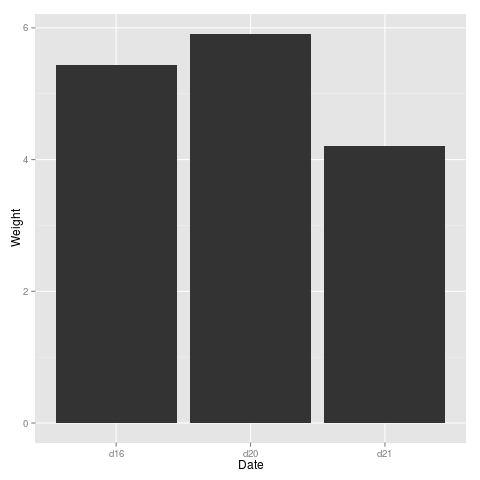

In [21]:
ggplot(cabbage_exp, aes(x=Date, y=Weight)) +
  geom_bar(stat="identity") 

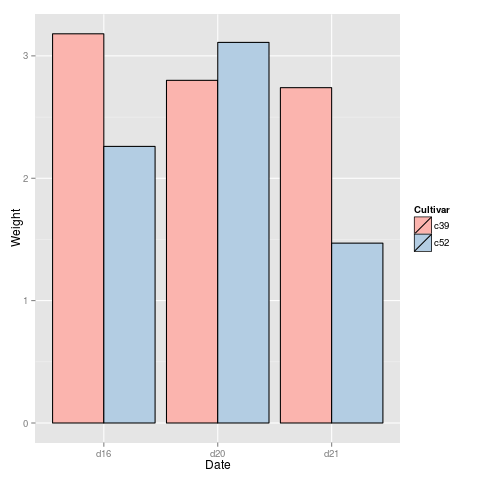

In [19]:
# 두 번째 변수를 기준으로 막대들을 묶어서 표현.
# Date를 x로 두고 Cultivar로 fill 색상을 결정하면, 하나의 Date에 Cultivar별로 색상이 다른 두개의 막대가 묶여서 그려짐.

ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) +
  geom_bar(position="dodge", colour="black", stat="identity") + 
  scale_fill_brewer(palette="Pastel1")

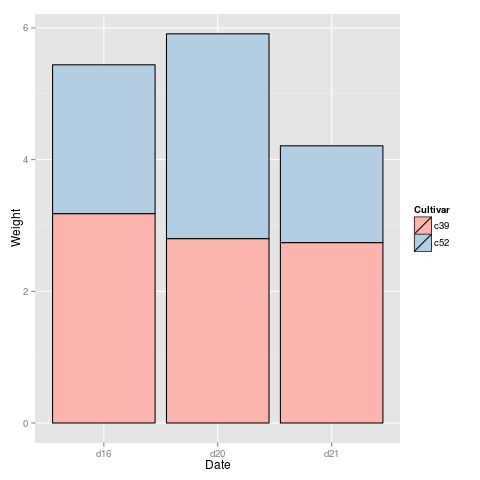

In [22]:
# dodge 설정이 없으면 누적(stacked) 막대그래프 생성
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) +
  geom_bar(colour="black", stat="identity") + 
  scale_fill_brewer(palette="Pastel1")

In [25]:
head(diamonds)

  carat       cut color clarity depth table price    x    y    z
1  0.23     Ideal     E     SI2  61.5    55   326 3.95 3.98 2.43
2  0.21   Premium     E     SI1  59.8    61   326 3.89 3.84 2.31
3  0.23      Good     E     VS1  56.9    65   327 4.05 4.07 2.31
4  0.29   Premium     I     VS2  62.4    58   334 4.20 4.23 2.63
5  0.31      Good     J     SI2  63.3    58   335 4.34 4.35 2.75
6  0.24 Very Good     J    VVS2  62.8    57   336 3.94 3.96 2.48

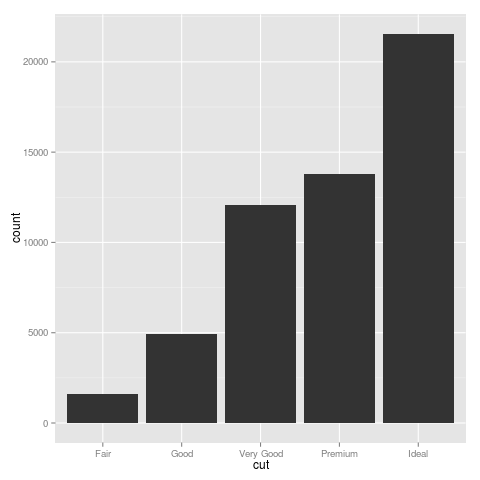

In [26]:
ggplot(diamonds, aes(x=cut))+geom_bar(stat="bin")

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


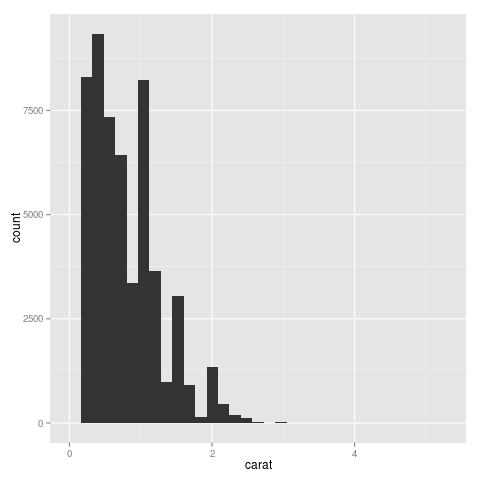

In [31]:
# x축에 연속 변수가 오는 경우
ggplot(diamonds, aes(x=carat)) + geom_bar()

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


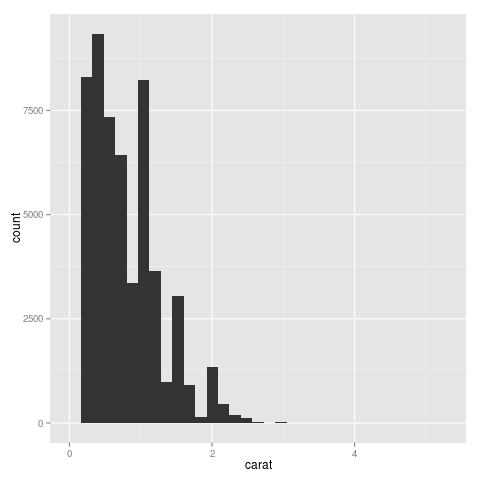

In [29]:
ggplot(diamonds, aes(x=carat)) + geom_histogram()

In [32]:
head(climate)

    Source Year Anomaly1y Anomaly5y Anomaly10y Unc10y
1 Berkeley 1800        NA        NA     -0.435  0.505
2 Berkeley 1801        NA        NA     -0.453  0.493
3 Berkeley 1802        NA        NA     -0.460  0.486
4 Berkeley 1803        NA        NA     -0.493  0.489
5 Berkeley 1804        NA        NA     -0.536  0.483
6 Berkeley 1805        NA        NA     -0.541  0.475

In [33]:
# climate 데이터의 일부를 가져와(csub : 1900년 이후 Berkely 데이터), 
# 값이 양수인지 음수인지를 나타내는 새로운 열 pos를 생성
csub <- subset(climate, Source=="Berkeley" & Year >= 1900)
csub$pos <- csub$Anomaly10y >= 0
head(csub)

      Source Year Anomaly1y Anomaly5y Anomaly10y Unc10y   pos
101 Berkeley 1900        NA        NA     -0.171  0.108 FALSE
102 Berkeley 1901        NA        NA     -0.162  0.109 FALSE
103 Berkeley 1902        NA        NA     -0.177  0.108 FALSE
104 Berkeley 1903        NA        NA     -0.199  0.104 FALSE
105 Berkeley 1904        NA        NA     -0.223  0.105 FALSE
106 Berkeley 1905        NA        NA     -0.241  0.107 FALSE

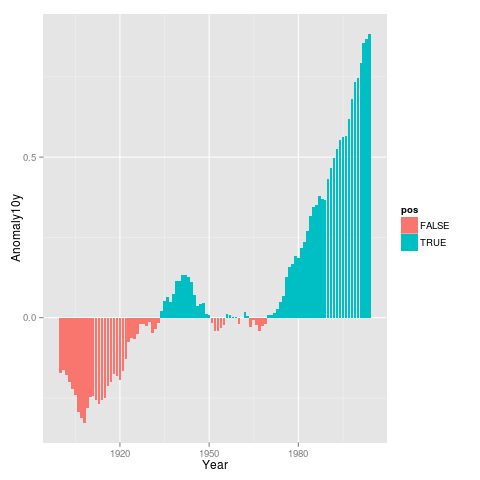

In [34]:
ggplot(csub, aes(x=Year, y=Anomaly10y, fill=pos)) + 
    geom_bar(stat="identity", position="identity")

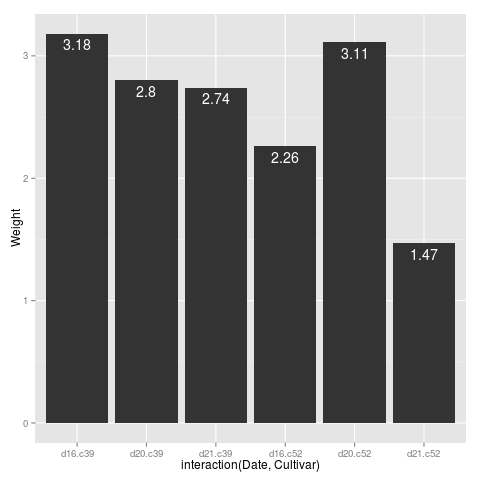

In [35]:
# 막대 라벨 추가 : geom_text()
ggplot(cabbage_exp, aes(x=interaction(Date, Cultivar), y=Weight)) +
      geom_bar(stat="identity") +
      geom_text(aes(label=Weight), vjust=1.5, colour="white")

ymax not defined: adjusting position using y instead


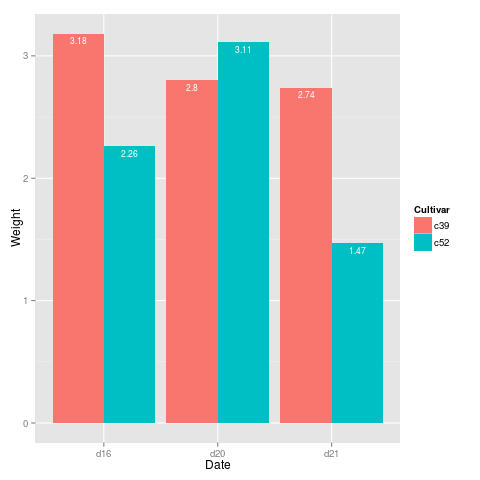

In [36]:
ggplot(cabbage_exp, aes(x=Date, y=Weight, fill=Cultivar)) +
      geom_bar(stat="identity", position="dodge") +
      geom_text(aes(label=Weight), vjust=1.5, colour="white", position=position_dodge(0.9), size=3)

In [40]:
# install.packages(''plyr')
library(plyr)

In [41]:
# ce : Date와 cultivar를 기준으로 정렬
ce <- arrange(cabbage_exp, Date, Cultivar)
# 누적 합계 얻기
ce <- ddply(ce, "Date", transform, label_y=cumsum(Weight))
ce

  Cultivar Date Weight        sd  n         se label_y
1      c39  d16   3.18 0.9566144 10 0.30250803    3.18
2      c52  d16   2.26 0.4452215 10 0.14079141    5.44
3      c39  d20   2.80 0.2788867 10 0.08819171    2.80
4      c52  d20   3.11 0.7908505 10 0.25008887    5.91
5      c39  d21   2.74 0.9834181 10 0.31098410    2.74
6      c52  d21   1.47 0.2110819 10 0.06674995    4.21

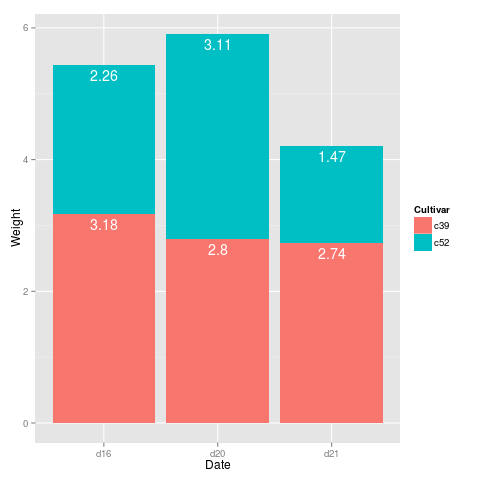

In [42]:
ggplot(ce, aes(x=Date, y=Weight, fill=Cultivar)) +
      geom_bar(stat="identity") +
      geom_text(aes(y=label_y, label=Weight), vjust=1.5, colour="white" )

In [ ]:
# 클리블랜드 점 그래프
# 막대그래프보다 시각적으로 덜 어수선하고 읽기 쉬움

In [43]:
head(tophitters2001) # Batting statistics for the top 144 hitters in Major League Baseball in 2001.

         id   first   last           name year stint team lg   g  ab   r   h 2b
1 walkela01   Larry Walker   Larry Walker 2001     1  COL NL 142 497 107 174 35
2 suzukic01  Ichiro Suzuki  Ichiro Suzuki 2001     1  SEA AL 157 692 127 242 34
3 giambja01   Jason Giambi   Jason Giambi 2001     1  OAK AL 154 520 109 178 47
4 alomaro01 Roberto Alomar Roberto Alomar 2001     1  CLE AL 157 575 113 193 34
5 heltoto01    Todd Helton    Todd Helton 2001     1  COL NL 159 587 132 197 54
6  aloumo01  Moises   Alou    Moises Alou 2001     1  HOU NL 136 513  79 170 31
  3b hr rbi sb cs  bb  so ibb hbp sh sf gidp    avg
1  3 38 123 14  5  82 103   6  14  0  8    9 0.3501
2  8  8  69 56 14  30  53  10   8  4  4    3 0.3497
3  2 38 120  2  0 129  83  24  13  0  9   17 0.3423
4 12 20 100 30  6  80  71   5   4  9  9    9 0.3357
5  2 49 146  7  5  98 104  15   5  1  5   14 0.3356
6  1 27 108  5  1  57  57  14   3  0  8   18 0.3314

In [44]:
str(tophitters2001)

'data.frame':	144 obs. of  26 variables:
 $ id   : Factor w/ 144 levels "abreubo01","alfoned01",..: 138 128 41 3 59 4 13 17 24 69 ...
 $ first: chr  "Larry" "Ichiro" "Jason" "Roberto" ...
 $ last : chr  "Walker" "Suzuki" "Giambi" "Alomar" ...
 $ name : chr  "Larry Walker" "Ichiro Suzuki" "Jason Giambi" "Roberto Alomar" ...
 $ year : int  2001 2001 2001 2001 2001 2001 2001 2001 2001 2001 ...
 $ stint: int  1 1 1 1 1 1 1 1 1 1 ...
 $ team : Factor w/ 30 levels "ANA","ARI","ATL",..: 10 25 21 9 10 13 13 25 29 3 ...
 $ lg   : Factor w/ 2 levels "AL","NL": 2 1 1 1 2 2 2 1 1 2 ...
 $ g    : int  142 157 154 157 159 136 156 158 133 159 ...
 $ ab   : int  497 692 520 575 587 513 577 623 463 572 ...
 $ r    : int  107 127 109 113 132 79 110 118 77 113 ...
 $ h    : int  174 242 178 193 197 170 191 206 153 189 ...
 $ 2b   : int  35 34 47 34 54 31 55 37 31 33 ...
 $ 3b   : int  3 8 2 12 2 1 5 3 5 5 ...
 $ hr   : int  38 8 38 20 49 27 34 37 11 38 ...
 $ rbi  : int  123 69 120 100 146 108 126 141 54

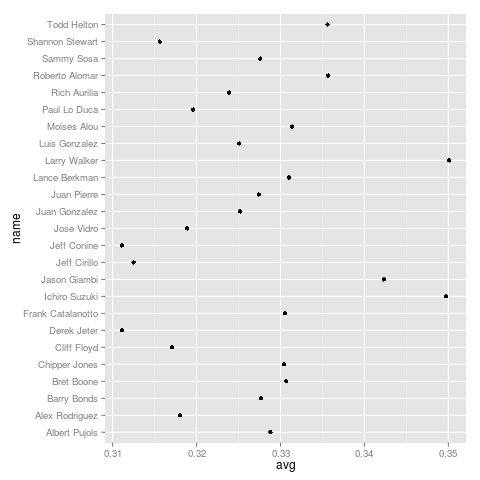

In [45]:
# tophitters2001 데이터에서 1~25번째 데이터를 가져옴
tophit <- tophitters2001[1:25, ]
ggplot(tophit, aes(x=avg, y=name)) + geom_point()

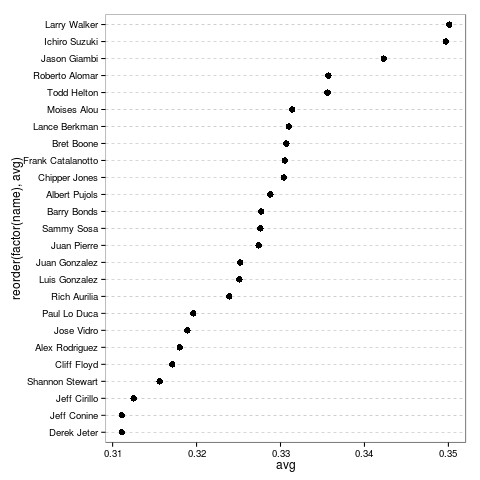

In [46]:
ggplot(tophit, aes(x=avg, y=reorder(factor(name), avg))) + # reorder(factor(name)) - name을 avg 순으로 정렬(문자열 벡터이기 대문에 기본 알파벳순 정렬)
      geom_point(size=3) + # 점의 크기를 키우기
      theme_bw() +  # 테마 시스템을 사용하여 수직 격자를 없애기
      theme(panel.grid.major.x=element_blank(), 
            panel.grid.minor.x=element_blank(),
            panel.grid.major.y=element_line(colour="grey60", linetype="dashed"))  # 수평선을 점선으로

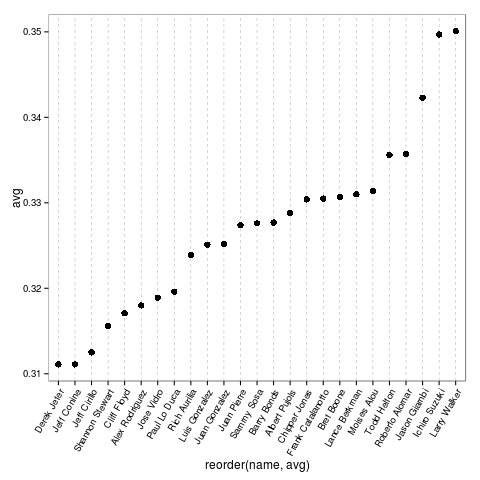

In [47]:
# x-y축을 바꾸고, 라벨을 60도 회전
ggplot(tophit, aes(x=reorder(name, avg), y=avg)) +
    geom_point(size=3) +
    theme_bw() +
    theme(axis.text.x = element_text(angle=60, hjust=1),
          panel.grid.major.y=element_blank(), 
          panel.grid.minor.y=element_blank(),
          panel.grid.major.x=element_line(colour="grey60", linetype="dashed"))

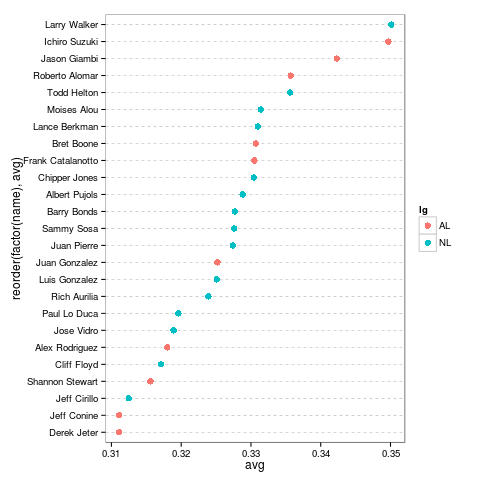

In [49]:
# lg(National/American League) 기준으로 집단 나눠서 보기
ggplot(tophit, aes(x=avg, y=reorder(factor(name), avg)))+
    geom_point(size=3, aes(colour=lg) ) + # lg 기준으로 그룹핑
    theme_bw()+
    theme(panel.grid.major.x=element_blank(), 
        panel.grid.minor.x=element_blank(),
        panel.grid.major.y=element_line(colour="grey60", linetype="dashed"))

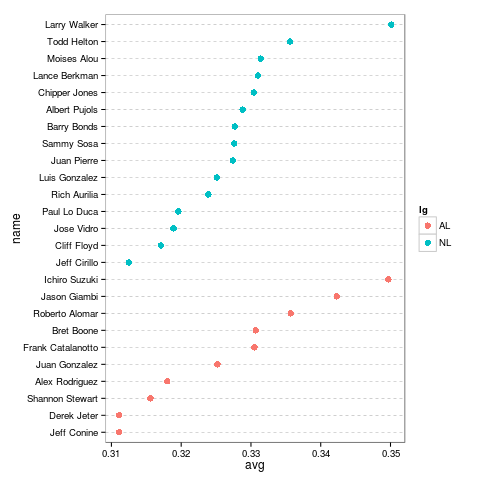

In [50]:
# lg 기준 정렬도 해보자
# reorder() 함수로는 한가지 요인 기준 정렬만 가능하므로, 수동으로 정렬
# lg로 먼저, 그 다음 avg로 정렬한 이름을 가져온다
nameorder <-tophit$name[order(tophit$lg, tophit$avg)]
# name을 factor로 변환 - nameorder 순으로 정렬
tophit$name <- factor(tophit$name, levels = nameorder)

ggplot(tophit, aes(x=avg, y=name)) +
    geom_point(size=3, aes(colour=lg) ) + # lg 기준으로 그룹핑
    theme_bw() +
    theme(panel.grid.major.x=element_blank(), 
        panel.grid.minor.x=element_blank(),
        panel.grid.major.y=element_line(colour="grey60", linetype="dashed"))

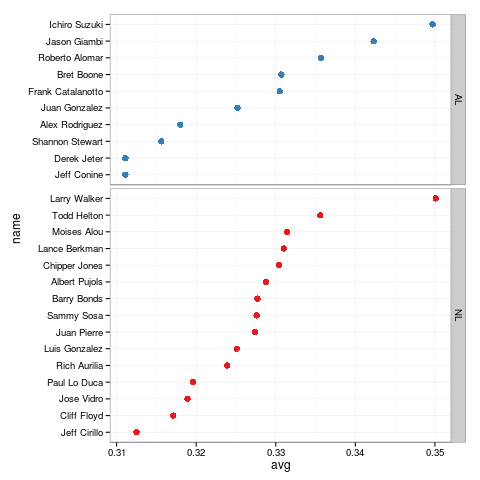

In [52]:
# facet(면분할) 사용하기
ggplot(tophit, aes(x=avg, y=name)) +
    geom_point(size=3, aes(colour=lg)) +
    scale_colour_brewer(palette="Set1", limits=c("NL","AL"), guide=FALSE)+
    theme_bw() +  
    facet_grid(lg ~ ., scales="free_y", space="free_y") #lg를 기준으로 면 분할

## Line Graphs

In [53]:
library(ggplot2)
library(gcookbook)

In [54]:
BOD

  Time demand
1    1    8.3
2    2   10.3
3    3   19.0
4    4   16.0
5    5   15.6
6    7   19.8

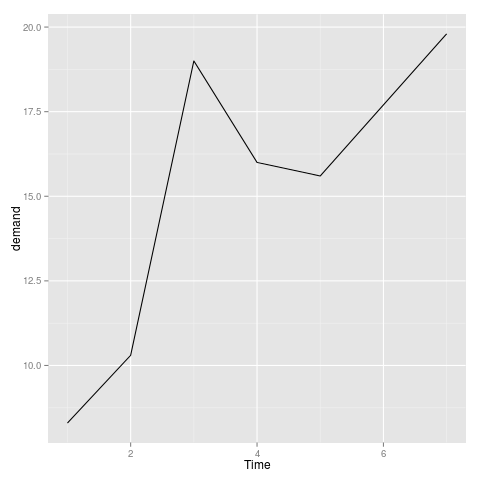

In [55]:
ggplot(BOD, aes(x=Time, y=demand)) + geom_line()

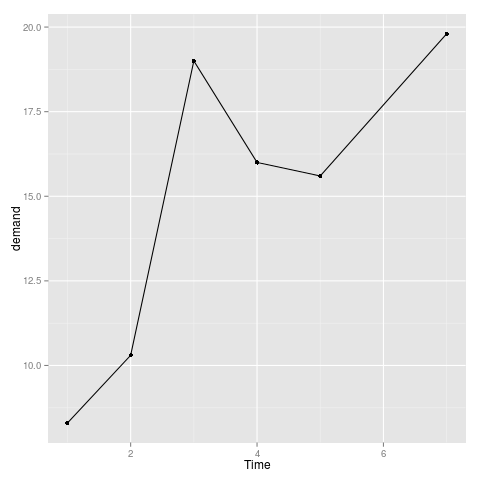

In [56]:
# 점 넣어주기
ggplot(BOD, aes(x=Time, y=demand)) + geom_line() + geom_point()

In [ ]:
# Multiple Lines

In [58]:
library(plyr)
head(ToothGrowth)

   len supp dose
1  4.2   VC  0.5
2 11.5   VC  0.5
3  7.3   VC  0.5
4  5.8   VC  0.5
5  6.4   VC  0.5
6 10.0   VC  0.5

In [59]:
# supp와 dose 기준 group by
tg <- ddply(ToothGrowth, c("supp", "dose"), summarise, length=mean(len))
tg

  supp dose length
1   OJ  0.5  13.23
2   OJ  1.0  22.70
3   OJ  2.0  26.06
4   VC  0.5   7.98
5   VC  1.0  16.77
6   VC  2.0  26.14

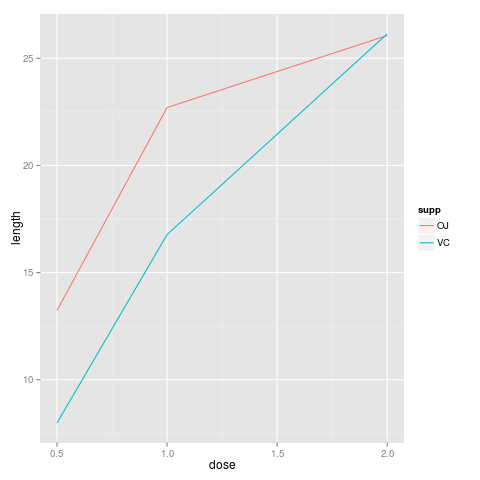

In [61]:
# supp로 나눠서 그리기
ggplot(tg, aes(x=dose, y=length, colour=supp)) + geom_line()

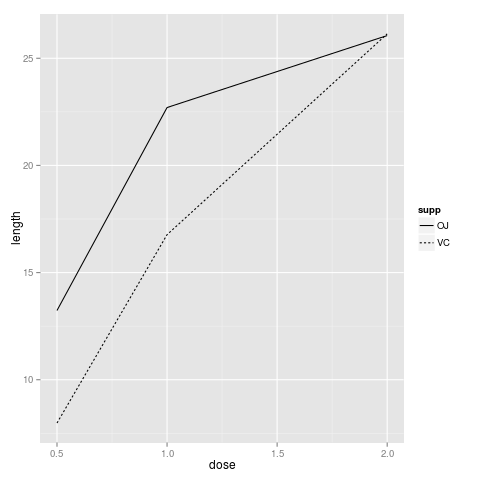

In [62]:
# Map supp to linetype
ggplot(tg, aes(x=dose, y=length, linetype=supp)) + geom_line()

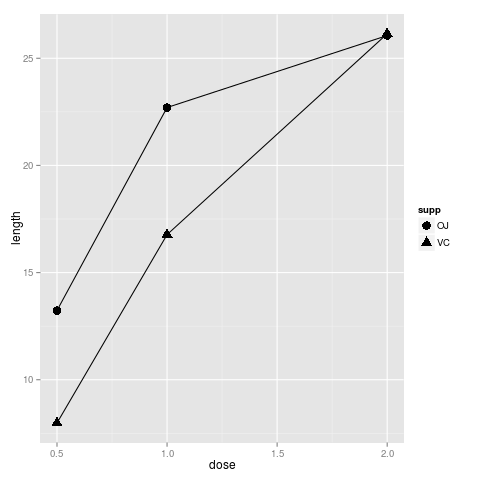

In [65]:
ggplot(tg, aes(x=dose, y=length, shape=supp)) + geom_line() + geom_point(size=4)

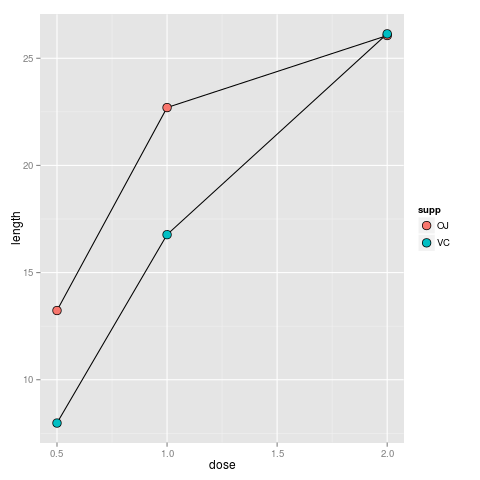

In [66]:
ggplot(tg, aes(x=dose, y=length, fill=supp)) + geom_line() +
geom_point(size=4, shape=21) # Also use a point with a color fill

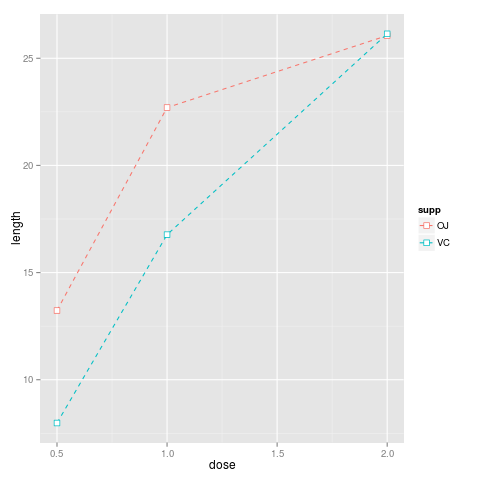

In [67]:
ggplot(tg, aes(x=dose, y=length, colour=supp)) +
    geom_line(linetype="dashed") +
    geom_point(shape=22, size=3, fill="white")

In [69]:
# 선 그래프의 영역 색칠하기

sunspot.year

Time Series:
Start = 1700 
End = 1988 
Frequency = 1 
  [1]   5.0  11.0  16.0  23.0  36.0  58.0  29.0  20.0  10.0   8.0   3.0   0.0
 [13]   0.0   2.0  11.0  27.0  47.0  63.0  60.0  39.0  28.0  26.0  22.0  11.0
 [25]  21.0  40.0  78.0 122.0 103.0  73.0  47.0  35.0  11.0   5.0  16.0  34.0
 [37]  70.0  81.0 111.0 101.0  73.0  40.0  20.0  16.0   5.0  11.0  22.0  40.0
 [49]  60.0  80.9  83.4  47.7  47.8  30.7  12.2   9.6  10.2  32.4  47.6  54.0
 [61]  62.9  85.9  61.2  45.1  36.4  20.9  11.4  37.8  69.8 106.1 100.8  81.6
 [73]  66.5  34.8  30.6   7.0  19.8  92.5 154.4 125.9  84.8  68.1  38.5  22.8
 [85]  10.2  24.1  82.9 132.0 130.9 118.1  89.9  66.6  60.0  46.9  41.0  21.3
 [97]  16.0   6.4   4.1   6.8  14.5  34.0  45.0  43.1  47.5  42.2  28.1  10.1
[109]   8.1   2.5   0.0   1.4   5.0  12.2  13.9  35.4  45.8  41.1  30.1  23.9
[121]  15.6   6.6   4.0   1.8   8.5  16.6  36.3  49.6  64.2  67.0  70.9  47.8
[133]  27.5   8.5  13.2  56.9 121.5 138.3 103.2  85.7  64.6  36.7  24.2  10.7
[145]  15.

In [70]:
sunspotyear <- data.frame(Year = as.numeric(time(sunspot.year)),
Sunspots = as.numeric(sunspot.year))
head(sunspotyear)

  Year Sunspots
1 1700        5
2 1701       11
3 1702       16
4 1703       23
5 1704       36
6 1705       58

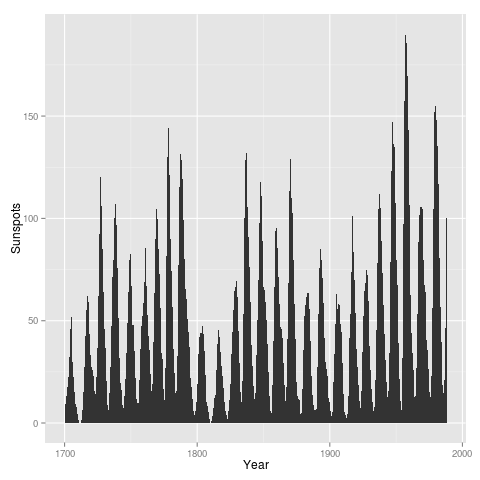

In [71]:
ggplot(sunspotyear, aes(x=Year, y=Sunspots)) + geom_area()

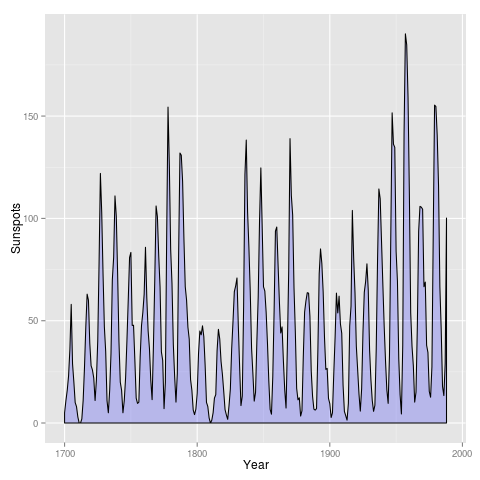

In [72]:
ggplot(sunspotyear, aes(x=Year, y=Sunspots)) +
geom_area(colour="black", fill="blue", alpha=.2)

In [75]:
# Stacked Area 그래프

head(uspopage, 15) # Age distribution of population in the United States, 1900-2002

   Year AgeGroup Thousands
1  1900       <5      9181
2  1900     5-14     16966
3  1900    15-24     14951
4  1900    25-34     12161
5  1900    35-44      9273
6  1900    45-54      6437
7  1900    55-64      4026
8  1900      >64      3099
9  1901       <5      9336
10 1901     5-14     17158
11 1901    15-24     15242
12 1901    25-34     12442
13 1901    35-44      9504
14 1901    45-54      6606
15 1901    55-64      4122

In [76]:
str(uspopage)

'data.frame':	824 obs. of  3 variables:
 $ Year     : int  1900 1900 1900 1900 1900 1900 1900 1900 1901 1901 ...
 $ AgeGroup : Factor w/ 8 levels "<5","5-14","15-24",..: 1 2 3 4 5 6 7 8 1 2 ...
 $ Thousands: int  9181 16966 14951 12161 9273 6437 4026 3099 9336 17158 ...


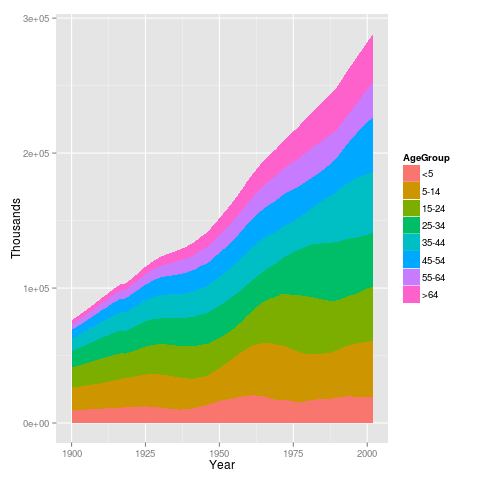

In [77]:
ggplot(uspopage, aes(x=Year, y=Thousands, fill=AgeGroup)) + geom_area()

In [78]:
# 시계열 그래프

head(climate)

    Source Year Anomaly1y Anomaly5y Anomaly10y Unc10y
1 Berkeley 1800        NA        NA     -0.435  0.505
2 Berkeley 1801        NA        NA     -0.453  0.493
3 Berkeley 1802        NA        NA     -0.460  0.486
4 Berkeley 1803        NA        NA     -0.493  0.489
5 Berkeley 1804        NA        NA     -0.536  0.483
6 Berkeley 1805        NA        NA     -0.541  0.475

In [79]:
clim <- subset(climate, Source == "Berkeley", select=c("Year", "Anomaly10y", "Unc10y"))
head(clim)

  Year Anomaly10y Unc10y
1 1800     -0.435  0.505
2 1801     -0.453  0.493
3 1802     -0.460  0.486
4 1803     -0.493  0.489
5 1804     -0.536  0.483
6 1805     -0.541  0.475

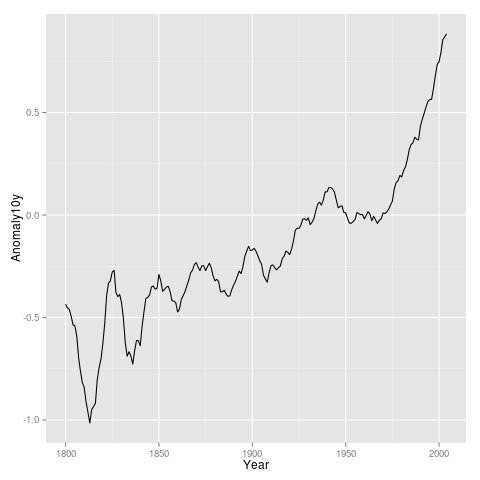

In [80]:
# 시계열 그래프
ggplot(clim, aes(x=Year, y=Anomaly10y)) +
    geom_line()

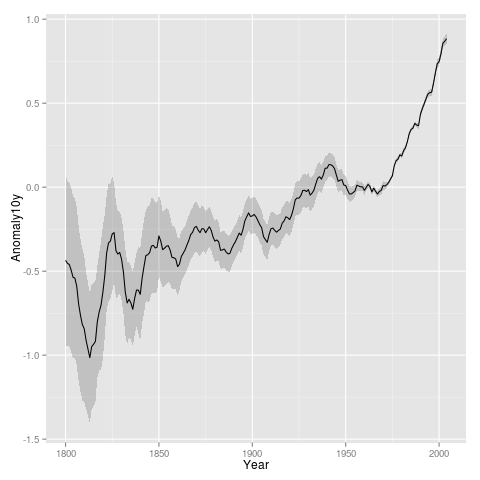

In [81]:
# Confidence Region 그리기
ggplot(clim, aes(x=Year, y=Anomaly10y)) +
    geom_ribbon(aes(ymin=Anomaly10y-Unc10y, ymax=Anomaly10y+Unc10y), alpha=0.2) + 
    geom_line()

## Scatter Plots

In [82]:
library(ggplot2)
library(gcookbook)

In [84]:
head(heightweight)

  sex ageYear ageMonth heightIn weightLb
1   f   11.92      143     56.3     85.0
2   f   12.92      155     62.3    105.0
3   f   12.75      153     63.3    108.0
4   f   13.42      161     59.0     92.0
5   f   15.92      191     62.5    112.5
6   f   14.25      171     62.5    112.0

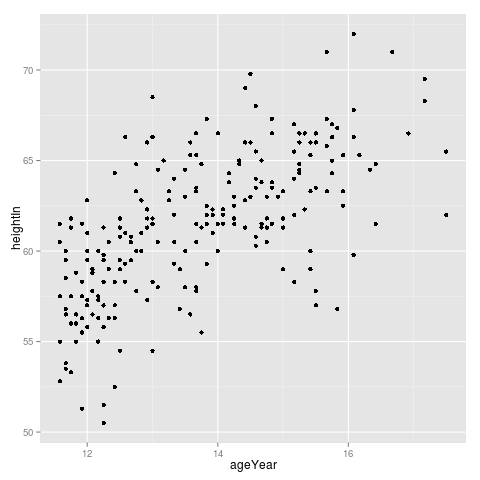

In [85]:
ggplot(heightweight, aes(x=ageYear, y=heightIn)) + 
    geom_point()

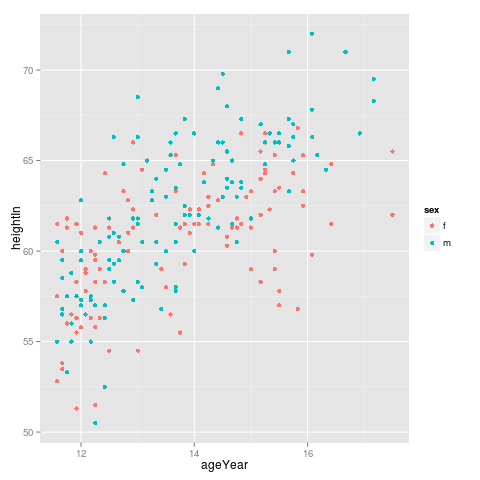

In [86]:
# 셩별 기준으로 칼라로 구분
ggplot(heightweight, aes(x=ageYear, y=heightIn, colour=sex)) + geom_point()

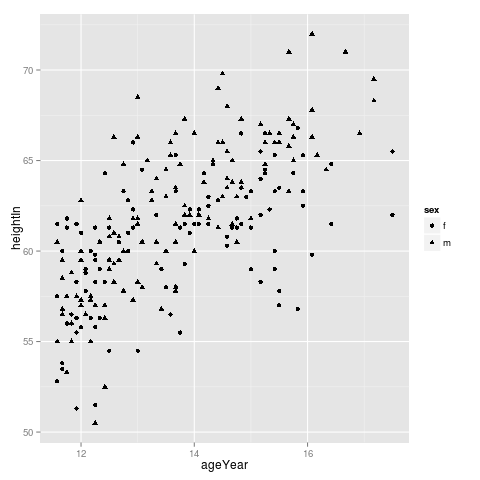

In [88]:
# 성별 기준으로 모양으로 구분
ggplot(heightweight, aes(x=ageYear, y=heightIn, shape=sex)) + geom_point()

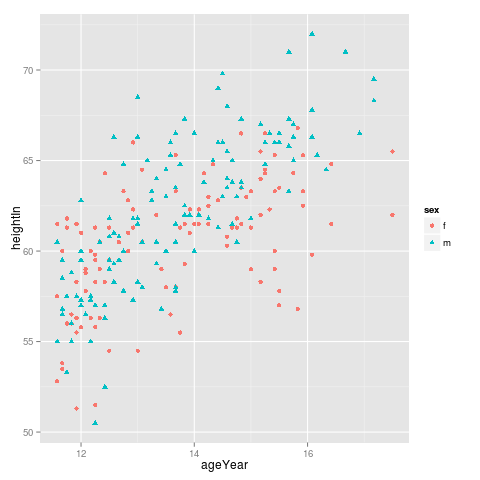

In [89]:
ggplot(heightweight, aes(x=ageYear, y=heightIn, colour=sex, shape=sex)) + geom_point()

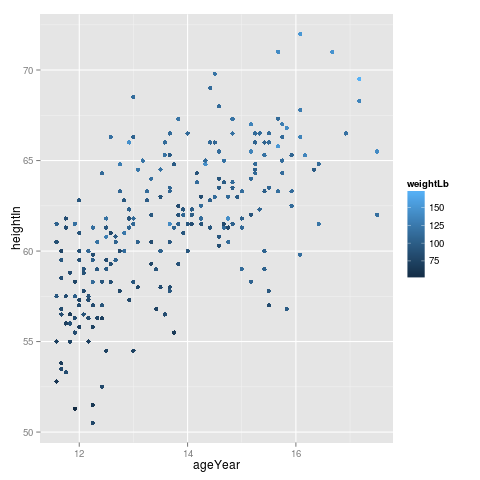

In [90]:
# 연속변수를 기준, 칼라로 구분
ggplot(heightweight, aes(x=ageYear, y=heightIn, color=weightLb)) + geom_point()

In [95]:
# 겹치는 데이터가 너무 많을 때

head(diamonds)

  carat       cut color clarity depth table price    x    y    z
1  0.23     Ideal     E     SI2  61.5    55   326 3.95 3.98 2.43
2  0.21   Premium     E     SI1  59.8    61   326 3.89 3.84 2.31
3  0.23      Good     E     VS1  56.9    65   327 4.05 4.07 2.31
4  0.29   Premium     I     VS2  62.4    58   334 4.20 4.23 2.63
5  0.31      Good     J     SI2  63.3    58   335 4.34 4.35 2.75
6  0.24 Very Good     J    VVS2  62.8    57   336 3.94 3.96 2.48

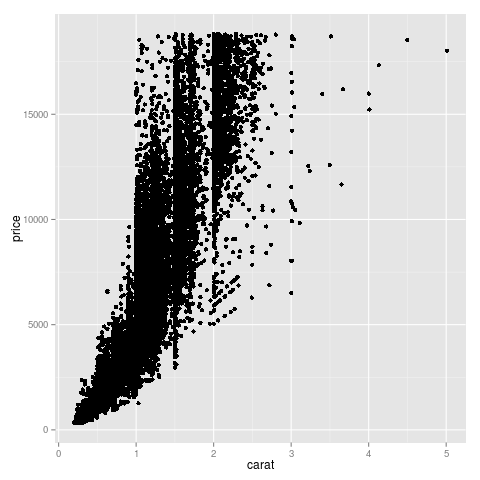

In [91]:
# 기본 옵션으로 그리면 겹치는 데이터가 너무 많다.
sp <- ggplot(diamonds, aes(x=carat, y=price))
sp + geom_point()

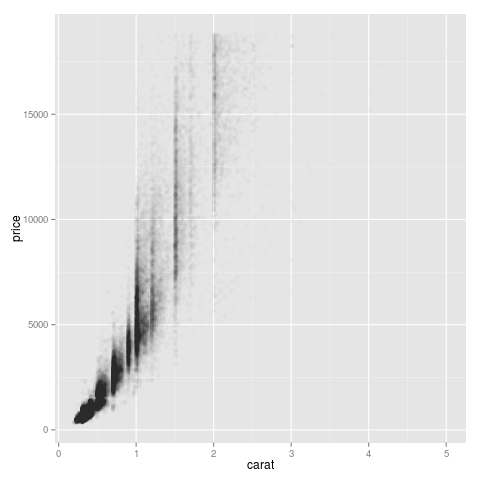

In [92]:
# alpha 투명도로 
sp + geom_point(alpha=.01)  

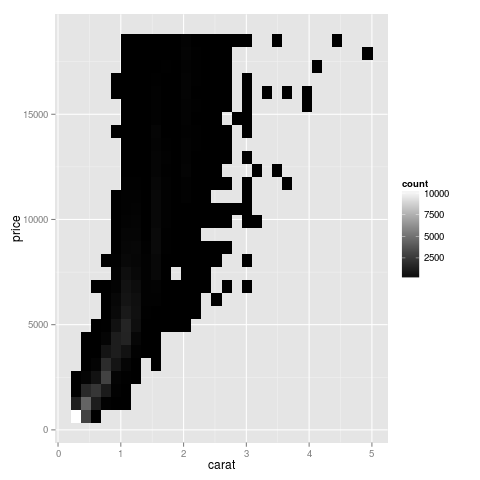

In [93]:
##binning(네모난 상자로데이터 묶어서)
sp + stat_bin2d(binds=50) + scale_fill_gradient(low="black", high="white")  

In [96]:
# jitter를 사용해볼까

head(ChickWeight)

  weight Time Chick Diet
1     42    0     1    1
2     51    2     1    1
3     59    4     1    1
4     64    6     1    1
5     76    8     1    1
6     93   10     1    1

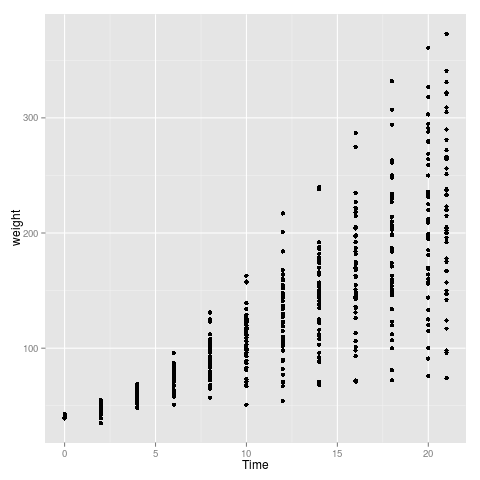

In [97]:
# 그냥 그리면.
sp1 <- ggplot(ChickWeight, aes(x=Time, y=weight))
sp1 + geom_point()

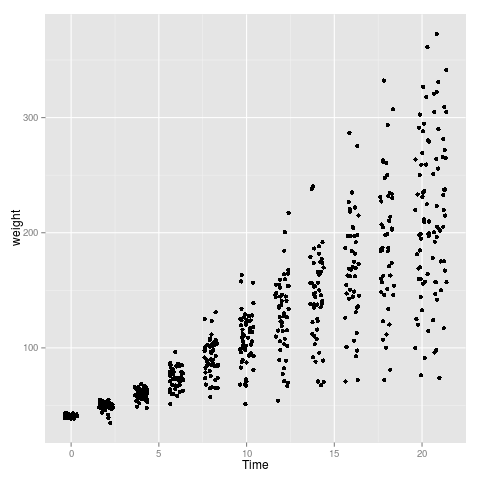

In [98]:
# 점들을 jitter(조금씩 움직여) 표시가능
sp1 + geom_point(position="jitter")     

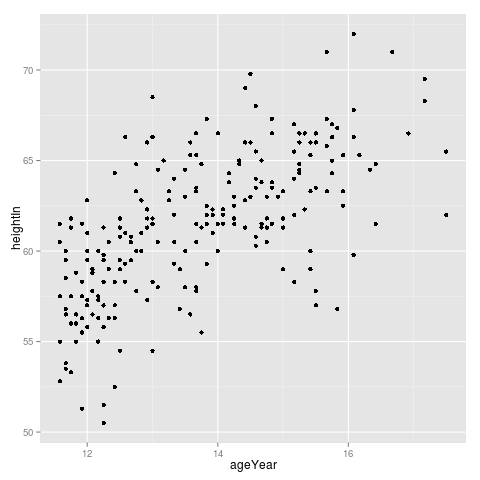

In [100]:
# 회귀선 추가

# 그냥 산포도
sp <-ggplot(heightweight, aes(x=ageYear, y=heightIn))
sp + geom_point()

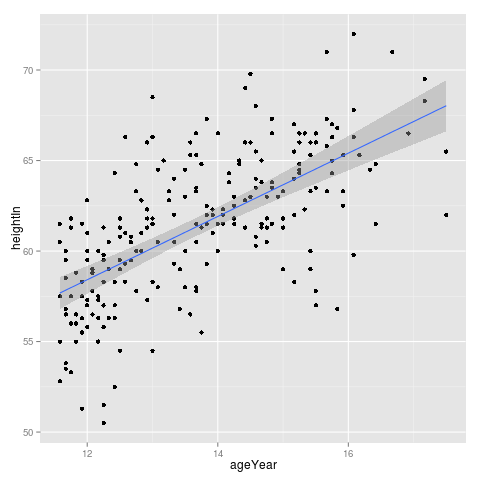

In [101]:
# lm 선형 모형으로 회귀선 추가. 0.99 신뢰구간 표시
sp + geom_point() + stat_smooth(method=lm, level=0.99)

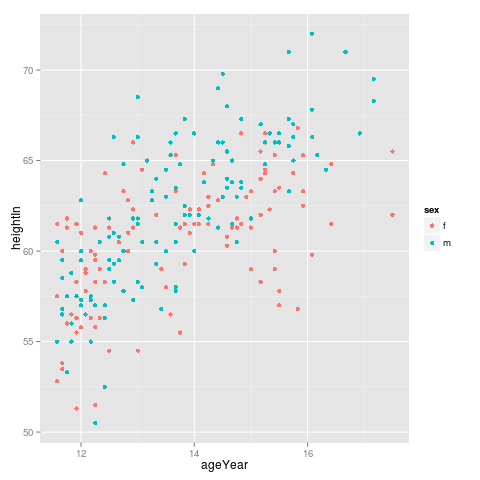

In [104]:
# 선 두개도 가능

# 산점도 내 요인을 기준으로 각 집단에 대해서 적합성 그리기
sps <- ggplot(heightweight, aes(x=ageYear, y=heightIn, color=sex)) + geom_point() 
sps

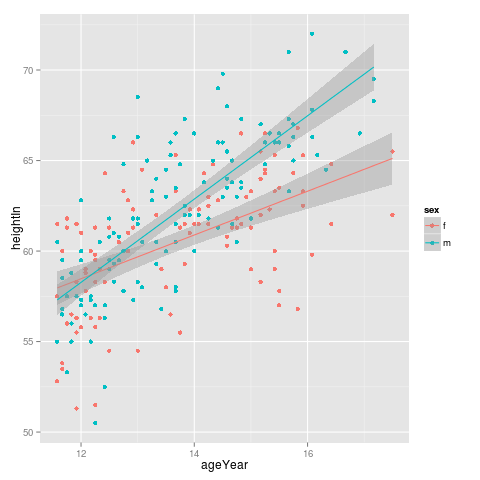

In [105]:
#남,여 각각에 대한 선형 모형
sps + geom_smooth(method=lm) 

In [106]:
# 점에 라벨 붙이기

head(countries)

         Name Code Year      GDP laborrate healthexp infmortality
1 Afghanistan  AFG 1960 55.60700        NA        NA           NA
2 Afghanistan  AFG 1961 55.66865        NA        NA           NA
3 Afghanistan  AFG 1962 54.35964        NA        NA           NA
4 Afghanistan  AFG 1963 73.19877        NA        NA           NA
5 Afghanistan  AFG 1964 76.37303        NA        NA           NA
6 Afghanistan  AFG 1965 94.09873        NA        NA           NA

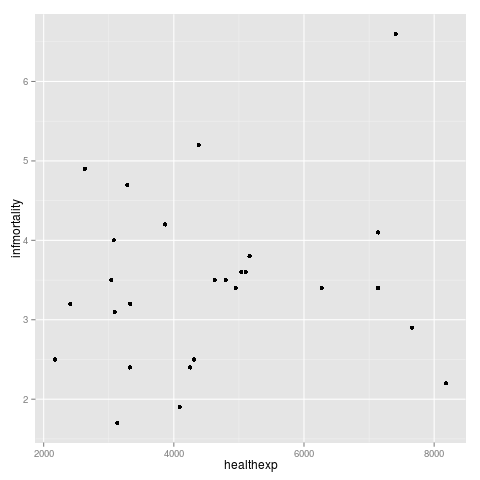

In [107]:
#의료비와 1000명 대비 유아 사망률 관계, 2009년
sp <- ggplot(subset(countries, Year==2009 & healthexp>2000), aes(x=healthexp, y=infmortality)) + geom_point() 
sp

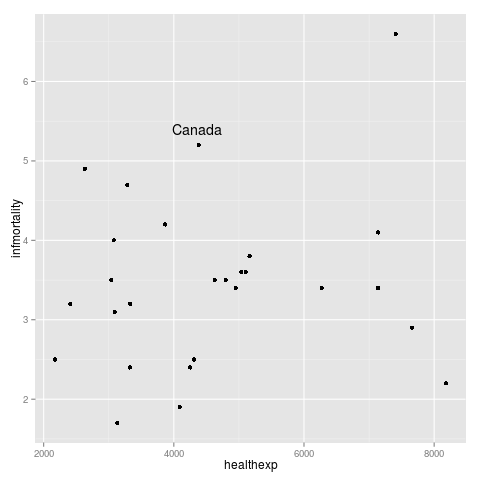

In [108]:
# 특정 점에 라벨링
sp + annotate("text", x=4350, y=5.4, label="Canada")    

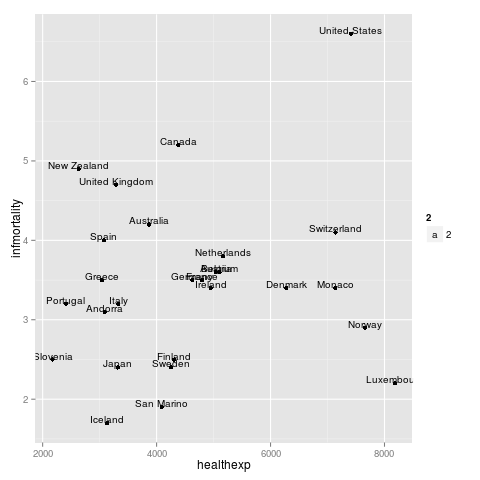

In [109]:
# 모두 표시
sp + geom_text(aes(label=Name, size=2, vjust=0))

## Summarized Data Distributions

In [110]:
# 히스토그램 만들기

head(faithful)

  eruptions waiting
1     3.600      79
2     1.800      54
3     3.333      74
4     2.283      62
5     4.533      85
6     2.883      55

In [111]:
summary(faithful)

   eruptions        waiting    
 Min.   :1.600   Min.   :43.0  
 1st Qu.:2.163   1st Qu.:58.0  
 Median :4.000   Median :76.0  
 Mean   :3.488   Mean   :70.9  
 3rd Qu.:4.454   3rd Qu.:82.0  
 Max.   :5.100   Max.   :96.0  

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


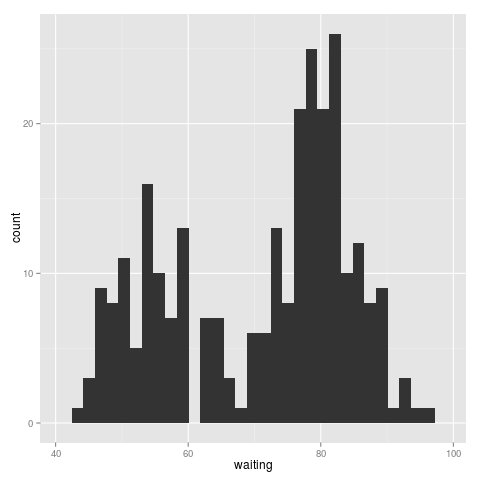

In [112]:
# 히스토그램
ggplot(faithful, aes(x=waiting)) + geom_histogram()

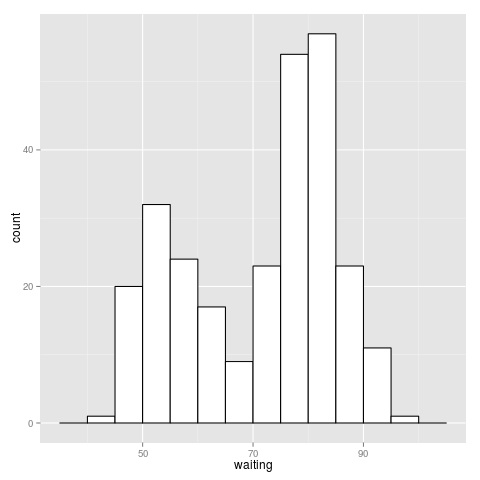

In [115]:
w <- faithful$waiting

# binwidth를 5로 
ggplot(faithful, aes(x=waiting)) + 
    geom_histogram(binwidth=5, fill="white", colour="black")

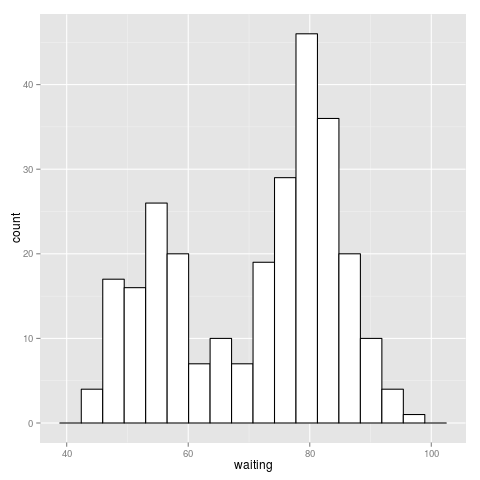

In [116]:
# 15개의 bin으로 
binsize <- diff(range(faithful$waiting))/15
ggplot(faithful, aes(x=waiting)) + 
    geom_histogram(binwidth=binsize, fill="white", colour="black")

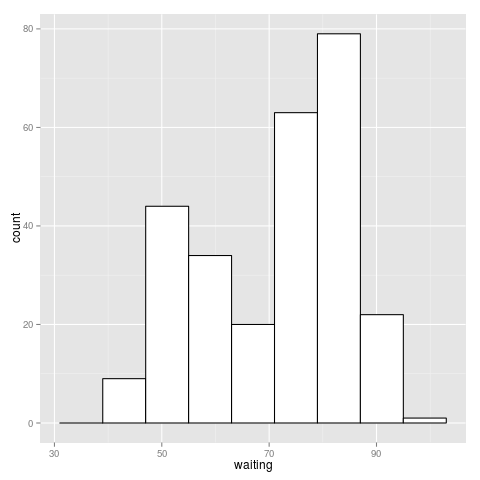

In [117]:
h <- ggplot(faithful, aes(x=waiting)) # 재사용 가능하게 만들고

# 31부터 시작, binwidth=9
h + geom_histogram(binwidth=8, fill="white", colour="black", origin=31)

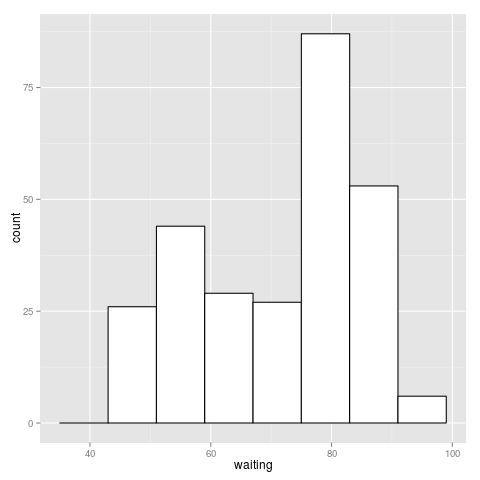

In [118]:
h + geom_histogram(binwidth=8, fill="white", colour="black", origin=35)

In [119]:
# 여러 히스토그램 보기

library(MASS)

head(birthwt)

   low age lwt race smoke ptl ht ui ftv  bwt
85   0  19 182    2     0   0  0  1   0 2523
86   0  33 155    3     0   0  0  0   3 2551
87   0  20 105    1     1   0  0  0   1 2557
88   0  21 108    1     1   0  0  1   2 2594
89   0  18 107    1     1   0  0  1   0 2600
91   0  21 124    3     0   0  0  0   0 2622

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.
stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


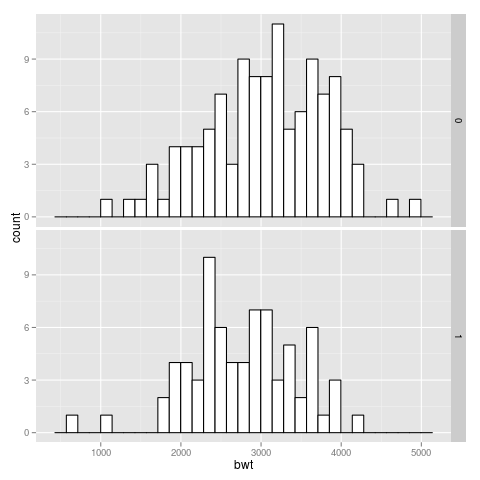

In [120]:
ggplot(birthwt, aes(x=bwt)) + 
    geom_histogram(fill="white", colour="black") +
    facet_grid(smoke ~ .)

In [121]:
# 칼라 겹쳐서 표현하기

birthwt1 <- birthwt # Make a copy of the data

# Convert smoke to a factor
birthwt1$smoke <- factor(birthwt1$smoke)
levels(birthwt1$smoke)

[1] "0" "1"

In [122]:
library(plyr) # For the revalue() function
birthwt1$smoke <- revalue(birthwt1$smoke, c("0"="No Smoke", "1"="Smoke"))

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


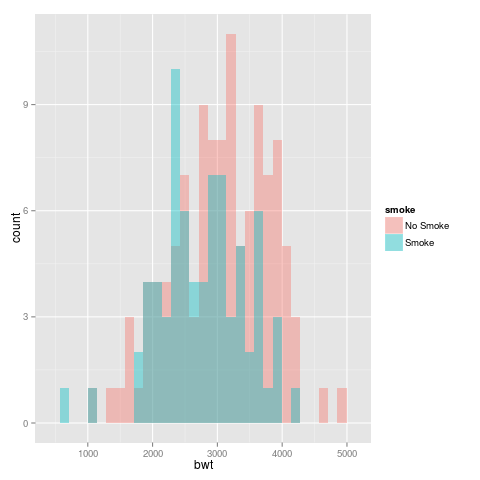

In [123]:
# Convert smoke to a factor
birthwt1$smoke <- factor(birthwt1$smoke)

# Map smoke to fill, make the bars NOT stacked, and make them semitransparent
ggplot(birthwt1, aes(x=bwt, fill=smoke)) +
    geom_histogram(position="identity", alpha=0.4)

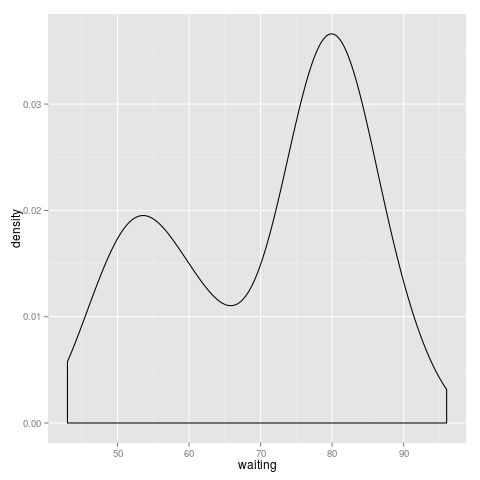

In [124]:
# density curve 그리기

ggplot(faithful, aes(x=waiting)) + geom_density()

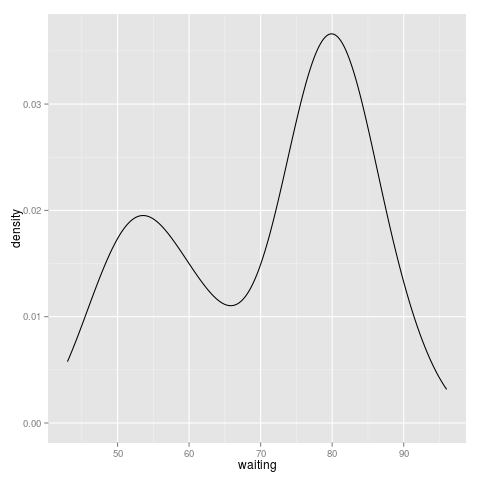

In [125]:
# The expand_limits() increases the y range to include the value 0
ggplot(faithful, aes(x=waiting)) + 
    geom_line(stat="density") +
    expand_limits(y=0)

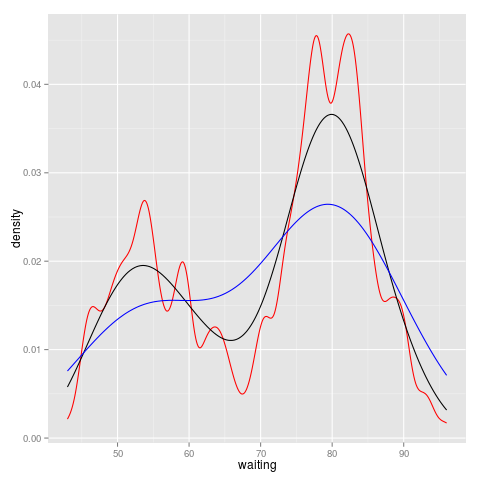

In [126]:
# 여러개 겹쳐 그리기

# Store the values in a simple vector
w <- faithful$waiting

ggplot(faithful, aes(x=waiting)) +
    geom_line(stat="density", adjust=.25, colour="red") +
    geom_line(stat="density") +
    geom_line(stat="density", adjust=2, colour="blue")

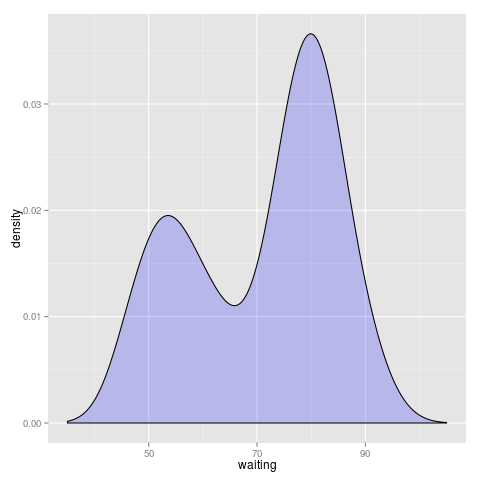

In [127]:
# 면적 채우기
ggplot(faithful, aes(x=waiting)) +
    geom_density(fill="blue", alpha=.2) +
    xlim(35, 105)

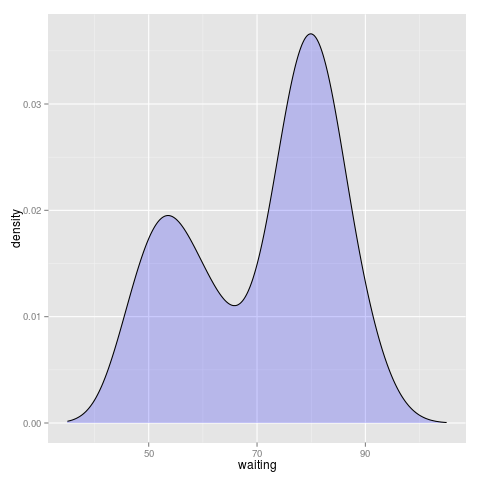

In [129]:
# This draws a blue polygon with geom_density(), then adds a line on top
ggplot(faithful, aes(x=waiting)) +
    geom_density(fill="blue", colour=NA, alpha=.2) +
    geom_line(stat="density") +
    xlim(35, 105)

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


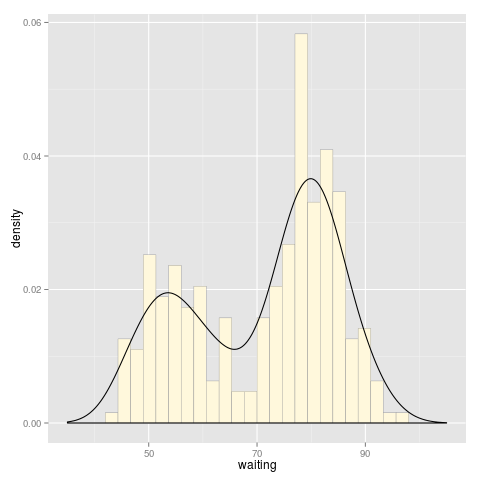

In [131]:
# 히스토그램에 겹쳐 그리기
ggplot(faithful, aes(x=waiting, y=..density..)) +
    geom_histogram(fill="cornsilk", colour="grey60", size=.2) +
    geom_density() +
    xlim(35, 105)

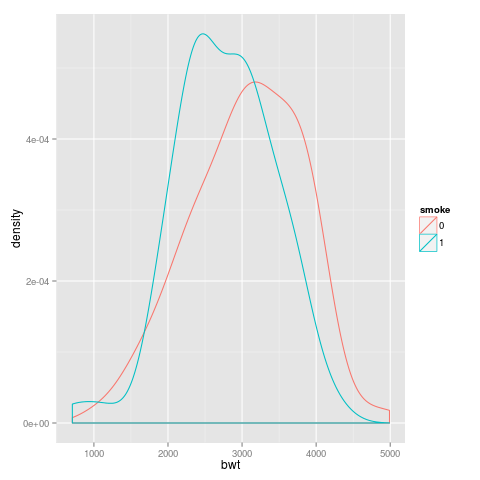

In [133]:
# 그룹핑된 데이터에 density curve들 겹쳐 그리기

library(MASS) # For the data set

# Make a copy of the data
birthwt1 <- birthwt

# Convert smoke to a factor
birthwt1$smoke <- factor(birthwt1$smoke)

# Map smoke to colour
ggplot(birthwt1, aes(x=bwt, colour=smoke)) + geom_density()

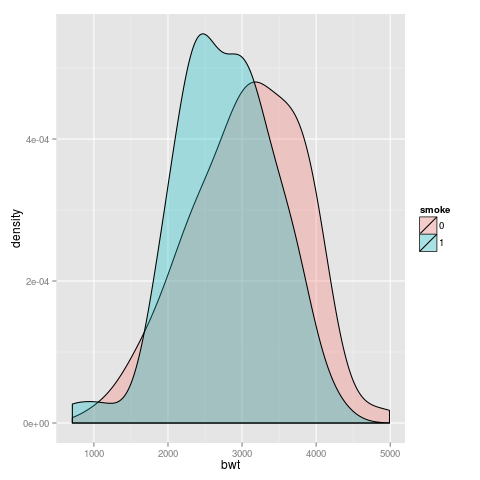

In [134]:
# Map smoke to fill and make the fill semitransparent by setting alpha
ggplot(birthwt1, aes(x=bwt, fill=smoke)) + geom_density(alpha=.3)

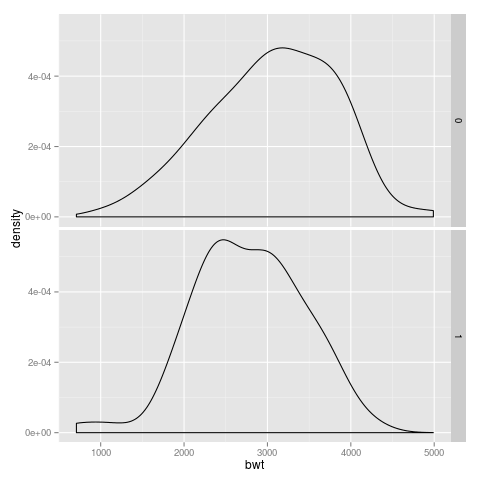

In [135]:
ggplot(birthwt1, aes(x=bwt)) + geom_density() + facet_grid(smoke ~ .)

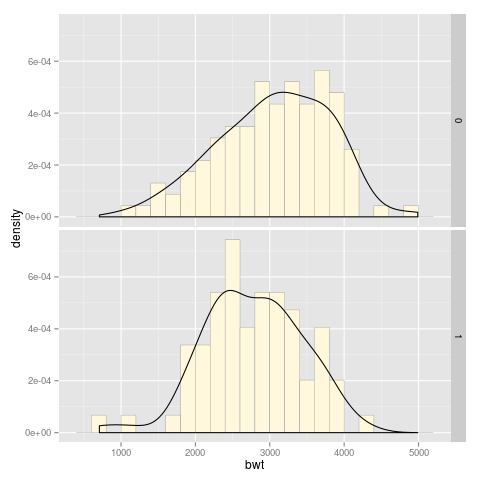

In [136]:
ggplot(birthwt1, aes(x=bwt, y=..density..)) +
    geom_histogram(binwidth=200, fill="cornsilk", colour="grey60", size=.2) +
    geom_density() +
    facet_grid(smoke ~ .)

stat_bin: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


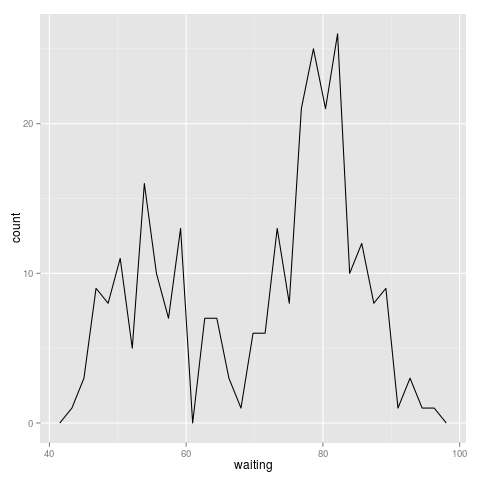

In [137]:
# Frequency Polygon 만들기

ggplot(faithful, aes(x=waiting)) + geom_freqpoly()

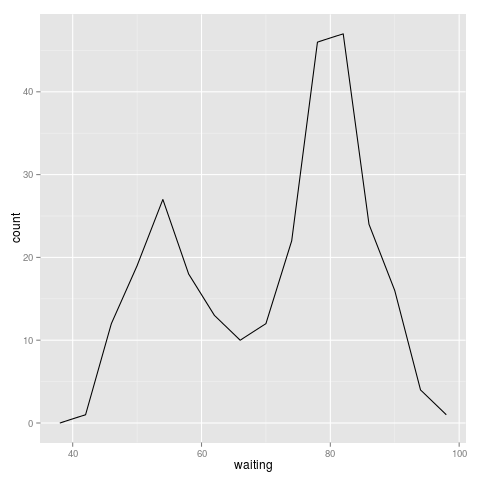

In [138]:
ggplot(faithful, aes(x=waiting)) + geom_freqpoly(binwidth=4)

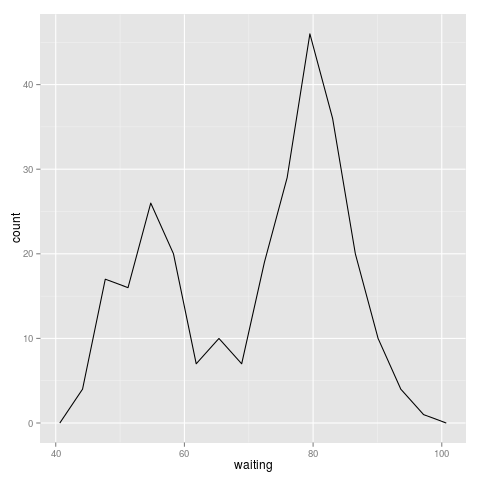

In [139]:
# Use 15 bins
binsize <- diff(range(faithful$waiting))/15
ggplot(faithful, aes(x=waiting)) + geom_freqpoly(binwidth=binsize)

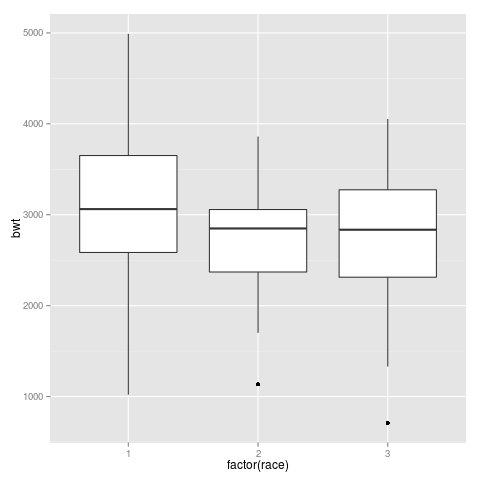

In [140]:
# Box Plot 그리기

library(MASS) # For the data set

ggplot(birthwt, aes(x=factor(race), y=bwt)) + geom_boxplot()

<img src="07_figures/07_fig.6.16.png" />

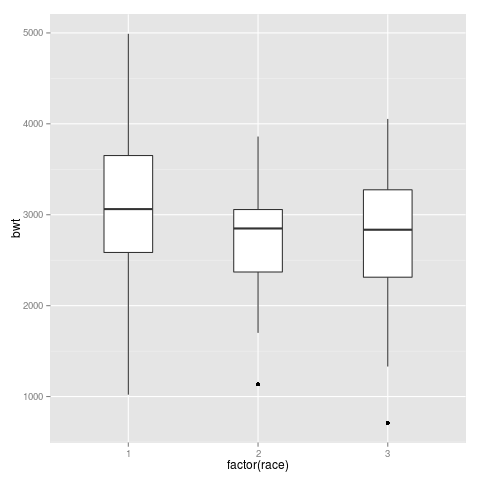

In [141]:
# 박스 넓이 조정해보기

ggplot(birthwt, aes(x=factor(race), y=bwt)) + geom_boxplot(width=.5)

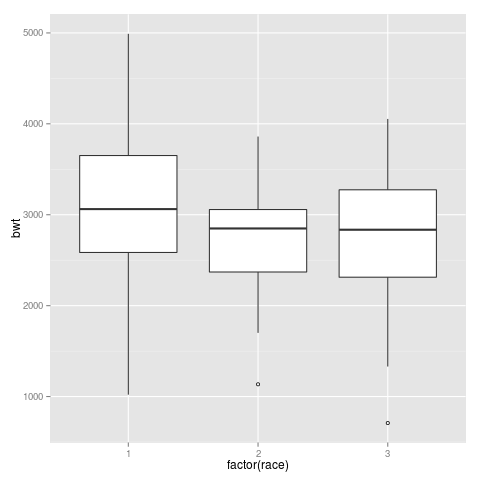

In [142]:
ggplot(birthwt, aes(x=factor(race), y=bwt)) +
    geom_boxplot(outlier.size=1.5, outlier.shape=21)

notch went outside hinges. Try setting notch=FALSE.


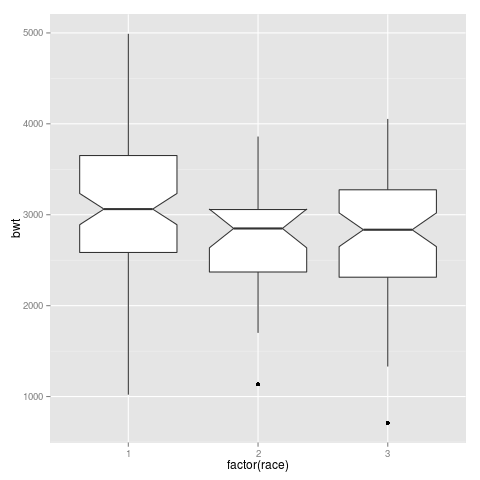

In [143]:
# median 차이를 좀 강조해보자
ggplot(birthwt, aes(x=factor(race), y=bwt)) + geom_boxplot(notch=TRUE)

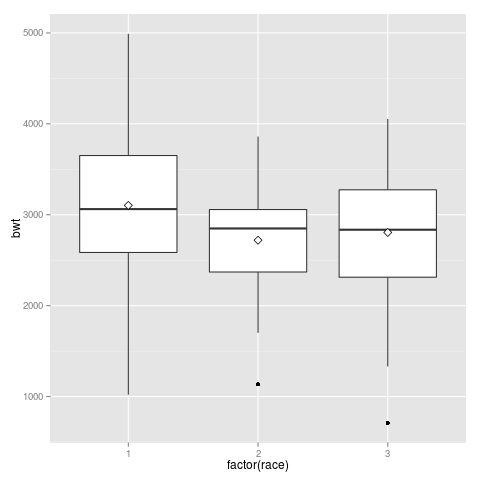

In [144]:
# box plot에 평균도 넣어서 그려보자
ggplot(birthwt, aes(x=factor(race), y=bwt)) + geom_boxplot() +
    stat_summary(fun.y="mean", geom="point", shape=23, size=3, fill="white")

In [145]:
# violin plot 그리기

library(gcookbook) # For the data set

# Base plot
p <- ggplot(heightweight, aes(x=sex, y=heightIn))

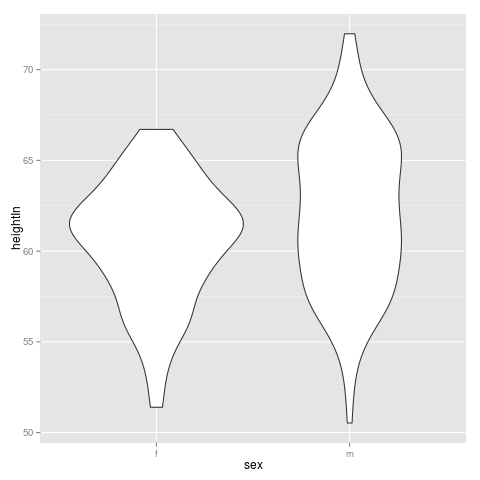

In [146]:
p + geom_violin()

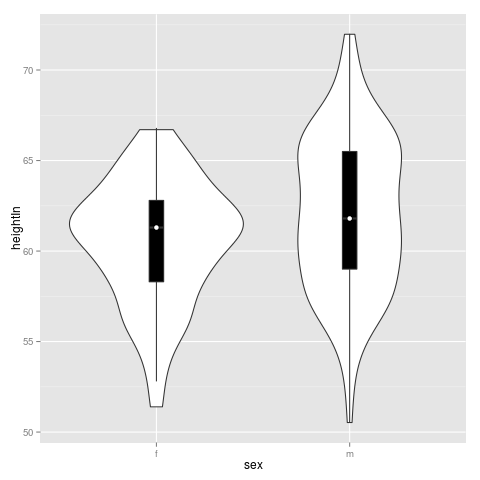

In [147]:
# box plot도 겹쳐서
p + geom_violin() + geom_boxplot(width=.1, fill="black", outlier.colour=NA) +
    stat_summary(fun.y=median, geom="point", fill="white", shape=21, size=2.5)

In [148]:
# Dot Plot 그리기 

library(gcookbook) # For the data set
countries2009 <- subset(countries, Year==2009 & healthexp>2000)

In [149]:
head(countries2009)

          Name Code Year      GDP laborrate healthexp infmortality
254    Andorra  AND 2009       NA        NA  3089.636          3.1
560  Australia  AUS 2009 42130.82      65.2  3867.429          4.2
611    Austria  AUT 2009 45555.43      60.4  5037.311          3.6
968    Belgium  BEL 2009 43640.20      53.5  5104.019          3.6
1733    Canada  CAN 2009 39599.04      67.8  4379.761          5.2
2702   Denmark  DNK 2009 55933.35      65.4  6272.729          3.4

stat_bindot: binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


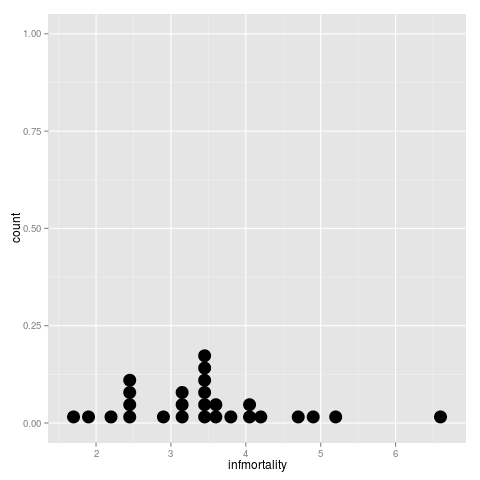

In [150]:
p <- ggplot(countries2009, aes(x=infmortality))
p + geom_dotplot()

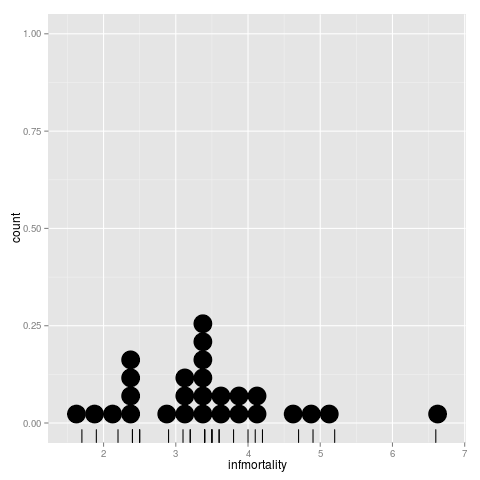

In [154]:
p + geom_dotplot(method="histodot", binwidth=.25) + geom_rug() 

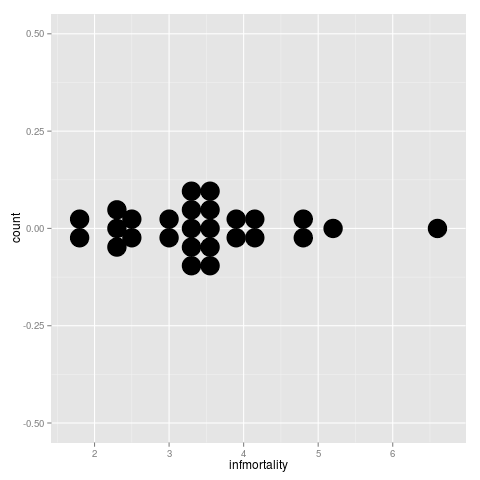

NULL

In [159]:
p + geom_dotplot(binwidth=.25, stackdir="center") 
    scale_y_continuous(breaks=NULL) + theme(axis.title.y=element_blank())

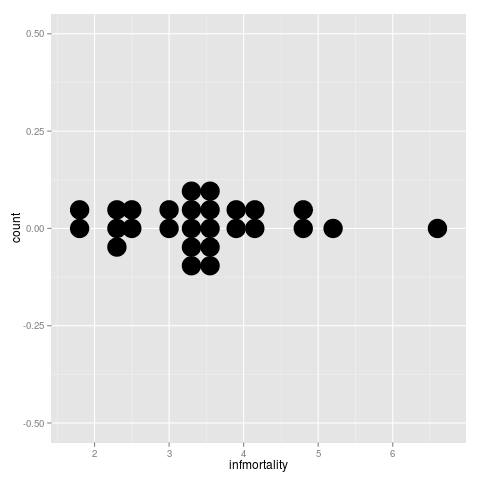

NULL

In [160]:
p + geom_dotplot(binwidth=.25, stackdir="centerwhole")
scale_y_continuous(breaks=NULL) + theme(axis.title.y=element_blank())

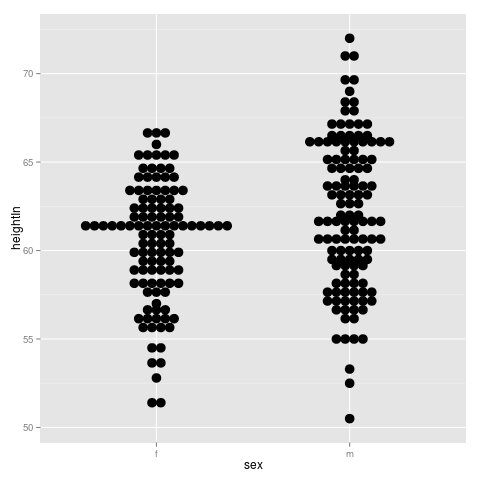

In [161]:
# 그룹화된 데이터에 대해, Dot Plot 여러개 그리기

library(gcookbook) # For the data set

ggplot(heightweight, aes(x=sex, y=heightIn)) +
    geom_dotplot(binaxis="y", binwidth=.5, stackdir="center")

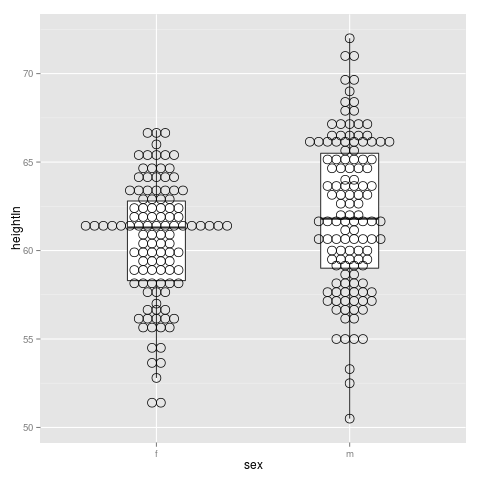

In [162]:
# box plot도 겹쳐보자
ggplot(heightweight, aes(x=sex, y=heightIn)) +
    geom_boxplot(outlier.colour=NA, width=.4) +
    geom_dotplot(binaxis="y", binwidth=.5, stackdir="center", fill=NA)

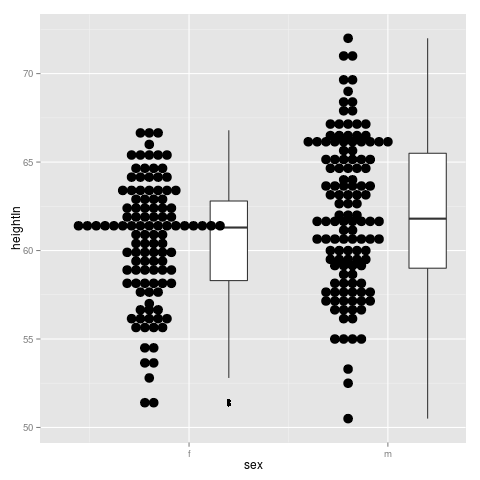

In [163]:
# 나란히 보기
ggplot(heightweight, aes(x=sex, y=heightIn)) +
    geom_boxplot(aes(x=as.numeric(sex) + .2, group=sex), width=.25) +
    geom_dotplot(aes(x=as.numeric(sex) - .2, group=sex), binaxis="y",
                        binwidth=.5, stackdir="center") +
    scale_x_continuous(breaks=1:nlevels(heightweight$sex),
                                labels=levels(heightweight$sex))

In [164]:
# 2차원 데이터에 대한 Density Plot 그리기

# The base plot
p <- ggplot(faithful, aes(x=eruptions, y=waiting))

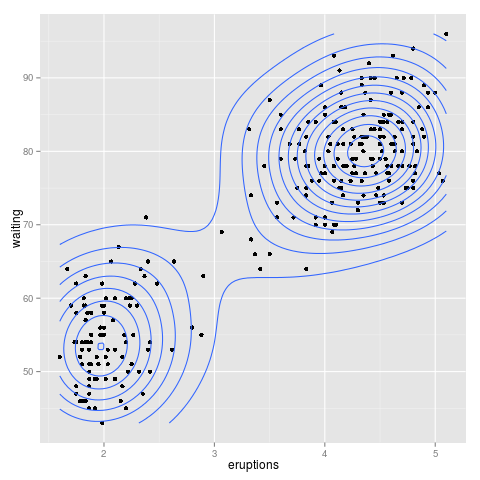

In [165]:
p + geom_point() + stat_density2d()

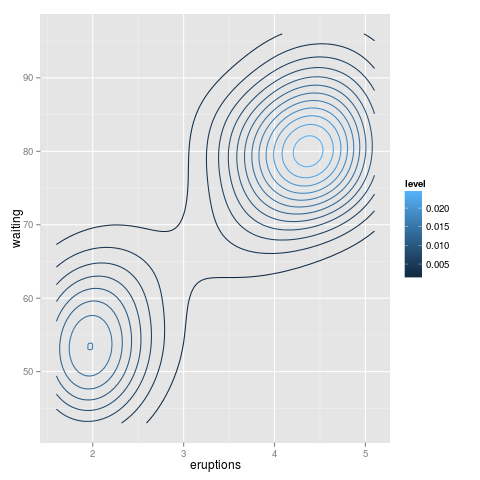

In [166]:
# 칼라 매핑하기.
p + stat_density2d(aes(colour=..level..)) # Contour lines, with "height" mapped to color

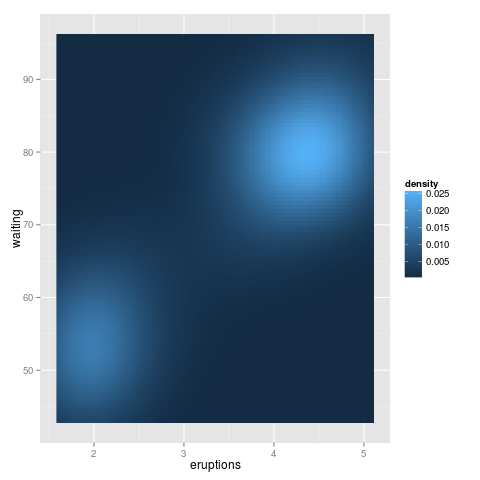

In [167]:
# Map density estimate to fill color
p + stat_density2d(aes(fill=..density..), geom="raster", contour=FALSE)

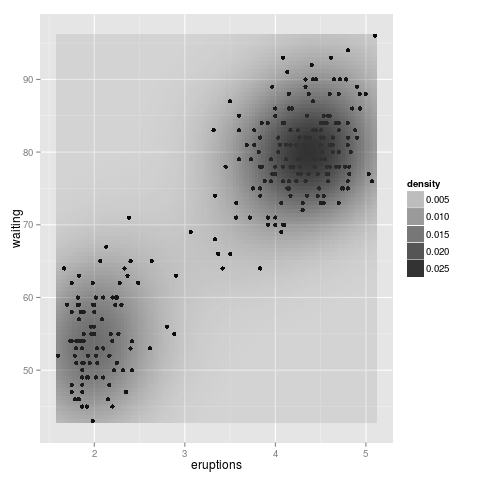

In [168]:
# With points, and map density estimate to alpha
p + geom_point() +
    stat_density2d(aes(alpha=..density..), geom="tile", contour=FALSE)

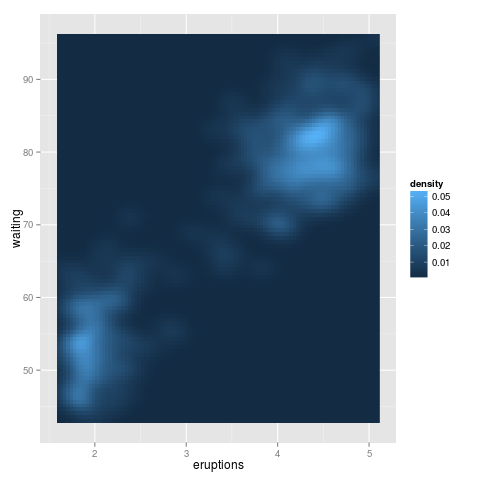

In [169]:
# raster 방식으로
p + stat_density2d(aes(fill=..density..), geom="raster",
    contour=FALSE, h=c(.5,5))

## Facets

In [170]:
# 면이 분할된 하위 그래프로 데이터를 나누기.
# 데이터 부분집합을 각 패널에 그린다.

library(ggplot2)
library(gcookbook)

head(mpg)

  manufacturer model displ year cyl      trans drv cty hwy fl   class
1         audi    a4   1.8 1999   4   auto(l5)   f  18  29  p compact
2         audi    a4   1.8 1999   4 manual(m5)   f  21  29  p compact
3         audi    a4   2.0 2008   4 manual(m6)   f  20  31  p compact
4         audi    a4   2.0 2008   4   auto(av)   f  21  30  p compact
5         audi    a4   2.8 1999   6   auto(l5)   f  16  26  p compact
6         audi    a4   2.8 1999   6 manual(m5)   f  18  26  p compact

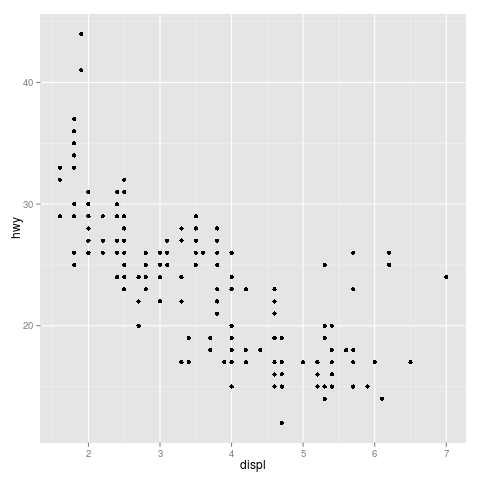

In [171]:
p <- ggplot(mpg, aes(x=displ, y=hwy)) + geom_point()
p

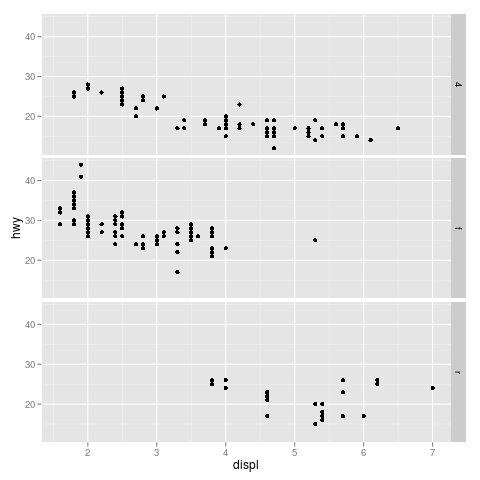

In [172]:
# drv 변수 기준으로, 수직 정렬.
p + facet_grid(drv ~.)

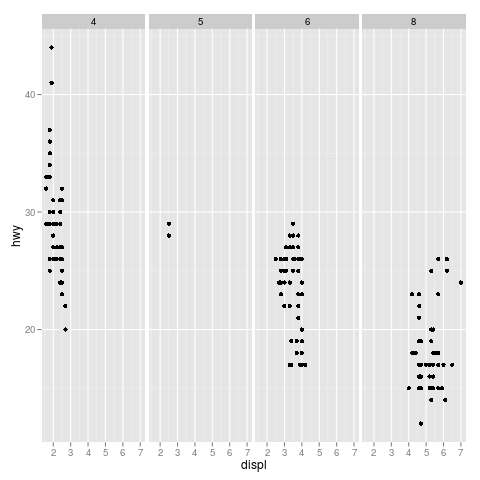

In [173]:
# cyl 변수 기준으로 수평 정렬, 
p + facet_grid(.~cyl) # cyl : 실린더 갯수

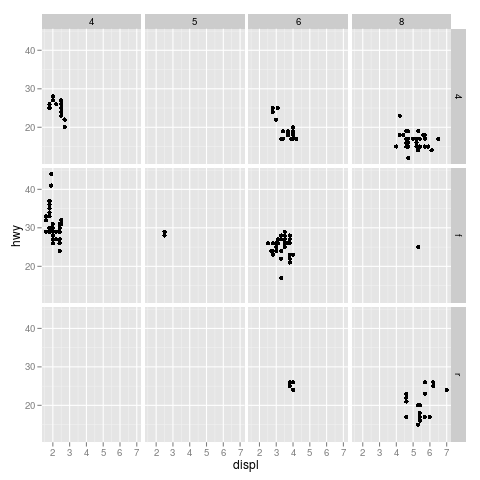

In [174]:
# 수평, 수직 동시 분할
p + facet_grid(drv ~ cyl)

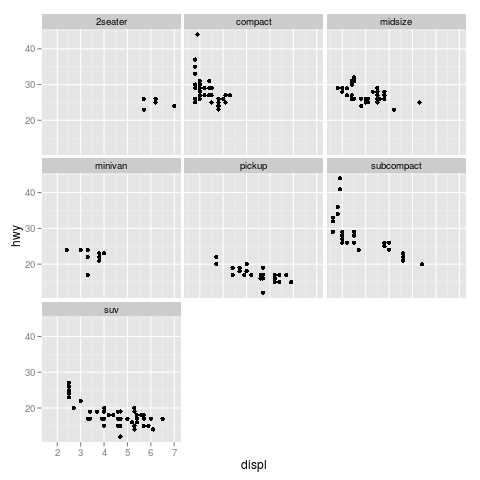

In [175]:
# facet_wrap 함수로 쉽게 

p + facet_wrap( ~ class)

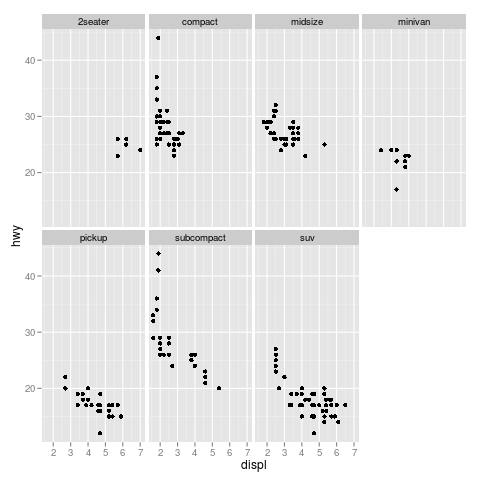

In [176]:
p + facet_wrap( ~ class, nrow=2)

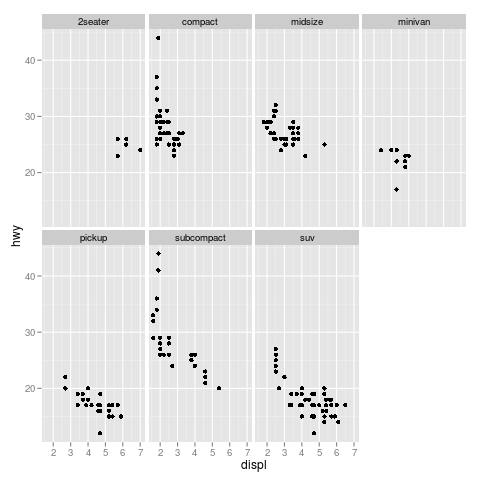

In [177]:
p + facet_wrap( ~ class, ncol=4)

# 참고자료

* [1] R Graphics Chapter 1 - https://www.stat.auckland.ac.nz/~paul/RGraphics/chapter1.html
* [2] Introduction to R Graphics with ggplot2 - http://www.slideshare.net/izahn/rgraphics-12040991
* [3] Discovering Statistics Using R - http://www.amazon.com/Discovering-Statistics-Using-Andy-Field/dp/1446200469
* [4] Discovering Statistics Using R, ch4. - https://books.google.co.kr/books?id=Q9GCAgAAQBAJ&pg=PA121&lpg=PA121&dq=ggplot2+anatomy+of+a+graph&source=bl&ots=eOS6C84TGP&sig=kf75eclaSR_xxHssLZUfyVikQaM&hl=ko&sa=X&ei=COMHVfvACOO4mAXliIHIBw&ved=0CEkQ6AEwBQ#v=onepage&q=ggplot2%20anatomy%20of%20a%20graph&f=false
* [5] ggplot2 Quick Reference - http://sape.inf.usi.ch/quick-reference/ggplot2
* [6] R Graphics Cookbook - http://www.amazon.com/R-Graphics-Cookbook-Winston-Chang/dp/1449316956